<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/HM_Imputation(All_Types_with_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Univariate Imputation

Univariate imputation is a method for handling missing values in a dataset where the missing values in a single feature (column) are imputed based *only* on the observed values within that same feature. It does not consider information from other features in the dataset when estimating the missing values. This approach is generally simpler and computationally less expensive compared to multivariate imputation.

### Common Univariate Imputation Strategies:

1.  **Mean Imputation**: Replace missing values with the mean of the observed values in that feature.
    *   **Pros**: Simple to implement, maintains the mean of the feature.
    *   **Cons**: Reduces variance, distorts relationships with other variables, can introduce bias if data is not missing completely at random (MCAR).

2.  **Median Imputation**: Replace missing values with the median of the observed values in that feature.
    *   **Pros**: Robust to outliers compared to mean imputation, simple to implement.
    *   **Cons**: Similar to mean imputation, it reduces variance and can distort relationships.

3.  **Mode (Most Frequent) Imputation**: Replace missing values with the most frequently occurring value in that feature.
    *   **Pros**: Suitable for categorical or discrete numerical data, simple to implement.
    *   **Cons**: Can over-represent the mode if many values are missing, reduces variance.

4.  **Constant Value Imputation**: Replace missing values with a specified constant value (e.g., 0, -1, 'missing').
    *   **Pros**: Useful when the missingness itself conveys information, or to flag missing entries.
    *   **Cons**: Can distort the distribution and relationships if the constant value is not carefully chosen.

### Example using Python (Scikit-learn's `SimpleImputer`):

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Create a sample DataFrame with missing values
data = {
    'Feature_A': [10, 12, np.nan, 14, 15, np.nan, 11, 13, 16, 17],
    'Feature_B': [20, np.nan, 22, 25, 21, 23, np.nan, 24, 26, 27],
    'Feature_C': ['Red', 'Blue', 'Green', 'Red', np.nan, 'Blue', 'Green', 'Red', 'Blue', np.nan]
}
df = pd.DataFrame(data)

print("Original DataFrame with missing values:")
display(df)

# --- Apply Univariate Imputation ---

# 1. Mean Imputation (for numerical data)
imputer_mean = SimpleImputer(strategy='mean')
df_mean_imputed = df.copy()
df_mean_imputed['Feature_A'] = imputer_mean.fit_transform(df_mean_imputed[['Feature_A']]).ravel()

print("\nDataFrame after Mean Imputation on Feature_A:")
display(df_mean_imputed)

# 2. Median Imputation (for numerical data)
imputer_median = SimpleImputer(strategy='median')
df_median_imputed = df.copy()
df_median_imputed['Feature_B'] = imputer_median.fit_transform(df_median_imputed[['Feature_B']]).ravel()

print("\nDataFrame after Median Imputation on Feature_B:")
display(df_median_imputed)

# 3. Most Frequent (Mode) Imputation (for numerical or categorical data)
imputer_mode = SimpleImputer(strategy='most_frequent')
df_mode_imputed = df.copy()
# Impute both numerical and categorical features using mode
df_mode_imputed['Feature_A'] = imputer_mode.fit_transform(df_mode_imputed[['Feature_A']]).ravel()
df_mode_imputed['Feature_C'] = imputer_mode.fit_transform(df_mode_imputed[['Feature_C']]).ravel()

print("\nDataFrame after Mode Imputation on Feature_A and Feature_C:")
display(df_mode_imputed)

# 4. Constant Imputation
imputer_constant = SimpleImputer(strategy='constant', fill_value=-99)
df_constant_imputed = df.copy()
df_constant_imputed['Feature_B'] = imputer_constant.fit_transform(df_constant_imputed[['Feature_B']]).ravel()

print("\nDataFrame after Constant Imputation (-99) on Feature_B:")
display(df_constant_imputed)

Original DataFrame with missing values:


,Feature_A,Feature_B,Feature_C
0,10.0,20.0,Red
1,12.0,NaN,Blue
2,NaN,22.0,Green
3,14.0,25.0,Red
4,15.0,21.0,NaN
5,NaN,23.0,Blue
6,11.0,NaN,Green
7,13.0,24.0,Red
8,16.0,26.0,Blue
9,17.0,27.0,NaN



DataFrame after Mean Imputation on Feature_A:


,Feature_A,Feature_B,Feature_C
0,10.0,20.0,Red
1,12.0,NaN,Blue
2,13.5,22.0,Green
3,14.0,25.0,Red
4,15.0,21.0,NaN
5,13.5,23.0,Blue
6,11.0,NaN,Green
7,13.0,24.0,Red
8,16.0,26.0,Blue
9,17.0,27.0,NaN



DataFrame after Median Imputation on Feature_B:


,Feature_A,Feature_B,Feature_C
0,10.0,20.0,Red
1,12.0,23.5,Blue
2,NaN,22.0,Green
3,14.0,25.0,Red
4,15.0,21.0,NaN
5,NaN,23.0,Blue
6,11.0,23.5,Green
7,13.0,24.0,Red
8,16.0,26.0,Blue
9,17.0,27.0,NaN



DataFrame after Mode Imputation on Feature_A and Feature_C:


,Feature_A,Feature_B,Feature_C
0,10.0,20.0,Red
1,12.0,NaN,Blue
2,10.0,22.0,Green
3,14.0,25.0,Red
4,15.0,21.0,Blue
5,10.0,23.0,Blue
6,11.0,NaN,Green
7,13.0,24.0,Red
8,16.0,26.0,Blue
9,17.0,27.0,Blue



DataFrame after Constant Imputation (-99) on Feature_B:


,Feature_A,Feature_B,Feature_C
0,10.0,20.0,Red
1,12.0,-99.0,Blue
2,NaN,22.0,Green
3,14.0,25.0,Red
4,15.0,21.0,NaN
5,NaN,23.0,Blue
6,11.0,-99.0,Green
7,13.0,24.0,Red
8,16.0,26.0,Blue
9,17.0,27.0,NaN


## Line-by-Line Explanation of Univariate Imputation Code

Let's break down the code for each univariate imputation method:

```python
# --- Apply Univariate Imputation ---
```
This is a comment indicating the start of the imputation section.

### 1. Mean Imputation (for numerical data)

```python
imputer_mean = SimpleImputer(strategy='mean')
```
This line creates an instance of `SimpleImputer` from `sklearn.impute`. We specify `strategy='mean'`, which tells the imputer to replace missing values with the mean of the column it's applied to.

```python
df_mean_imputed = df.copy()
```
Here, we create a copy of our original DataFrame `df`. This is crucial to ensure that we don't modify the original `df` and can apply different imputation methods independently to separate copies.

```python
df_mean_imputed['Feature_A'] = imputer_mean.fit_transform(df_mean_imputed[['Feature_A']]).ravel()
```
*   `df_mean_imputed[['Feature_A']]`: We select 'Feature_A' from our copied DataFrame. We use double brackets `[[...]]` to ensure it's passed as a DataFrame (a 2D array-like structure), which is what `fit_transform` expects.
*   `imputer_mean.fit_transform(...)`: This method first calculates the mean of the non-missing values in `Feature_A` (`fit`) and then replaces all `np.nan` values in `Feature_A` with that calculated mean (`transform`). The output of `fit_transform` is a NumPy array.
*   `.ravel()`: The `fit_transform` method returns a 2D NumPy array (even for a single column). To assign it back correctly to a Pandas Series (a DataFrame column), we need to flatten it into a 1D array using `.ravel()`.

```python
print("\nDataFrame after Mean Imputation on Feature_A:")
display(df_mean_imputed)
```
These lines print a descriptive header and then display the DataFrame `df_mean_imputed` using `display()` for a formatted output, showing the result of mean imputation on 'Feature_A'.

### 2. Median Imputation (for numerical data)

```python
imputer_median = SimpleImputer(strategy='median')
```
Similar to mean imputation, but this time `strategy='median'` is used, so missing values will be replaced by the median of the column.

```python
df_median_imputed = df.copy()
```
Another copy of the original DataFrame `df` is made for median imputation.

```python
df_median_imputed['Feature_B'] = imputer_median.fit_transform(df_median_imputed[['Feature_B']]).ravel()
```
Here, `SimpleImputer` with `strategy='median'` is applied to 'Feature_B'. It calculates the median of 'Feature_B' and replaces its `np.nan` values. The `.ravel()` method flattens the output before assignment.

```python
print("\nDataFrame after Median Imputation on Feature_B:")
display(df_median_imputed)
```
Prints a header and displays the DataFrame after median imputation on 'Feature_B'.

### 3. Most Frequent (Mode) Imputation (for numerical or categorical data)

```python
imputer_mode = SimpleImputer(strategy='most_frequent')
```
An imputer is created with `strategy='most_frequent'`, which means missing values will be filled with the mode (the most frequently occurring value) of the column.

```python
df_mode_imputed = df.copy()
```
Yet another copy of `df` is created for mode imputation.

```python
# Impute both numerical and categorical features using mode
df_mode_imputed['Feature_A'] = imputer_mode.fit_transform(df_mode_imputed[['Feature_A']]).ravel()
df_mode_imputed['Feature_C'] = imputer_mode.fit_transform(df_mode_imputed[['Feature_C']]).ravel()
```
Mode imputation is versatile and can be used for both numerical and categorical data. Here, it's applied to:
*   `Feature_A`: Missing numerical values are replaced by the most frequent numerical value in 'Feature_A'.
*   `Feature_C`: Missing categorical values are replaced by the most frequent category in 'Feature_C'.
In both cases, `fit_transform` calculates the mode, replaces `np.nan`s, and `.ravel()` flattens the output for correct assignment.

```python
print("\nDataFrame after Mode Imputation on Feature_A and Feature_C:")
display(df_mode_imputed)
```
Prints a header and displays the DataFrame after mode imputation on 'Feature_A' and 'Feature_C'.

### 4. Constant Imputation

```python
imputer_constant = SimpleImputer(strategy='constant', fill_value=-99)
```
This creates an imputer that uses a `constant` strategy. The `fill_value=-99` argument specifies that all missing values should be replaced with the number -99. You can choose any constant value that makes sense for your data (e.g., 0, 'missing', etc.).

```python
df_constant_imputed = df.copy()
```
One last copy of the original DataFrame `df` for constant imputation.

```python
df_constant_imputed['Feature_B'] = imputer_constant.fit_transform(df_constant_imputed[['Feature_B']]).ravel()
```
The `SimpleImputer` with the 'constant' strategy is applied to 'Feature_B', replacing its `np.nan` values with -99. The `.ravel()` method flattens the output.

```python
print("\nDataFrame after Constant Imputation (-99) on Feature_B:")
display(df_constant_imputed)
```
Finally, prints a header and displays the DataFrame after constant imputation on 'Feature_B'.

In summary, each section demonstrates how to use `SimpleImputer` with a specific strategy to handle missing values in a single feature, creating a new DataFrame for each imputed result.

### Explanation of the Example:

In the example above, we first create a Pandas DataFrame with missing values (`np.nan`) in `Feature_A` (numerical), `Feature_B` (numerical), and `Feature_C` (categorical).

We then demonstrate different univariate imputation strategies using `sklearn.impute.SimpleImputer`:

*   **Mean Imputation**: The `NaN` values in `Feature_A` are replaced by the mean of the observed values in `Feature_A`.
*   **Median Imputation**: The `NaN` values in `Feature_B` are replaced by the median of the observed values in `Feature_B`.
*   **Most Frequent Imputation**: The `NaN` values in `Feature_A` and `Feature_C` are replaced by their respective modes (most frequent values).
*   **Constant Imputation**: The `NaN` values in `Feature_B` are replaced by a specified constant value, `-99` in this case.

As you can see, each imputation is performed independently on a single feature without considering the values in other features.

#PROGRAM 1: Mean vs Median (Numeric – Outliers Effect)

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

df = pd.DataFrame({
    'Income': [25000, 27000, np.nan, 30000, 32000, 35000, 1000000]
})

print("Original Data:")
display(df)

# Mean Imputation
mean_imp = SimpleImputer(strategy='mean')
df['Income_Mean'] = mean_imp.fit_transform(df[['Income']])

# Median Imputation
median_imp = SimpleImputer(strategy='median')
df['Income_Median'] = median_imp.fit_transform(df[['Income']])

print("After Mean vs Median Imputation:")
display(df)


Original Data:


,Income
0,25000.0
1,27000.0
2,NaN
3,30000.0
4,32000.0
5,35000.0
6,1000000.0


After Mean vs Median Imputation:


,Income,Income_Mean,Income_Median
0,25000.0,25000.0,25000.0
1,27000.0,27000.0,27000.0
2,NaN,191500.0,31000.0
3,30000.0,30000.0,30000.0
4,32000.0,32000.0,32000.0
5,35000.0,35000.0,35000.0
6,1000000.0,1000000.0,1000000.0


### When to use Mean vs. Median Imputation in Numerical Columns

The choice between mean and median imputation for numerical columns largely depends on the distribution of your data and, specifically, the presence of outliers.

### Mean Imputation (Strategy='mean')

*   **When to use**: Mean imputation is generally suitable when the data is **symmetrically distributed** and does **not contain significant outliers**. In such cases, the mean is a good representation of the central tendency of the data.
*   **Why**: The mean is the arithmetic average of all values. If the data is normally distributed or close to it, replacing missing values with the mean will maintain the overall mean of the feature and can be a reasonable estimate.
*   **Caution**: The mean is heavily influenced by outliers. If your data has extreme values, using the mean for imputation will pull the imputed values towards these outliers, potentially distorting the distribution and relationships of the imputed feature with other variables.

### Median Imputation (Strategy='median')

*   **When to use**: Median imputation is preferred when the data is **skewed** or contains **outliers**. The median is a more robust measure of central tendency in the presence of extreme values.
*   **Why**: The median is the middle value in a dataset when ordered from least to greatest. It is not affected by extremely large or small values, making it a robust statistic. If your data has outliers, imputing with the median will provide a more representative and less biased estimate for the missing values than the mean.
*   **Example from `PROGRAM 1`**: In the `PROGRAM 1: Mean vs Median (Numeric – Outliers Effect)` example, notice how the `Income` column has a significant outlier (1,000,000). The mean imputation results in a much higher imputed value (191,500.0) compared to the median imputation (31,000.0) for the missing income. This clearly demonstrates the median's robustness to outliers.

In summary, always inspect your numerical data's distribution. If you detect outliers or significant skewness, the median is generally a safer and more appropriate choice for imputation. If the data is well-behaved and symmetrical, the mean can be used.

#🔹 PROGRAM 2: Mode Imputation (Categorical Feature)

In [3]:
df = pd.DataFrame({
    'City': ['Delhi', 'Mumbai', np.nan, 'Delhi', 'Bangalore', np.nan, 'Delhi']
})

print("Original Data:")
display(df)

mode_imp = SimpleImputer(strategy='most_frequent')
df['City_Imputed'] = mode_imp.fit_transform(df[['City']]).ravel()

print("After Mode Imputation:")
display(df)

Original Data:


,City
0,Delhi
1,Mumbai
2,NaN
3,Delhi
4,Bangalore
5,NaN
6,Delhi


After Mode Imputation:


,City,City_Imputed
0,Delhi,Delhi
1,Mumbai,Mumbai
2,NaN,Delhi
3,Delhi,Delhi
4,Bangalore,Bangalore
5,NaN,Delhi
6,Delhi,Delhi


#🔹 PROGRAM 3: Constant Imputation + Missing Indicator

In [4]:
from sklearn.impute import MissingIndicator

df = pd.DataFrame({
    'Experience': [2, 3, np.nan, 5, np.nan, 4]
})

print("Original Data:")
display(df)

# Constant Imputation
const_imp = SimpleImputer(strategy='constant', fill_value=-1)
df['Experience_Imputed'] = const_imp.fit_transform(df[['Experience']])

# Missing Indicator
indicator = MissingIndicator()
missing_flag = indicator.fit_transform(df[['Experience']])

df['Experience_Missing_Flag'] = missing_flag

print("After Constant Imputation + Indicator:")
display(df)


Original Data:


,Experience
0,2.0
1,3.0
2,NaN
3,5.0
4,NaN
5,4.0


After Constant Imputation + Indicator:


,Experience,Experience_Imputed,Experience_Missing_Flag
0,2.0,2.0,False
1,3.0,3.0,False
2,NaN,-1.0,True
3,5.0,5.0,False
4,NaN,-1.0,True
5,4.0,4.0,False


In [5]:
df = pd.DataFrame({
    'Loan_Amount': [200000, np.nan, 150000, np.nan, 300000],
    'Approved': [1, 0, 1, 0, 1]
})

df['Loan_Amount_Missing'] = df['Loan_Amount'].isnull().astype(int)

imputer = SimpleImputer(strategy='constant', fill_value=-1)
df['Loan_Amount_Imputed'] = imputer.fit_transform(df[['Loan_Amount']])

display(df)


,Loan_Amount,Approved,Loan_Amount_Missing,Loan_Amount_Imputed
0,200000.0,1,0,200000.0
1,NaN,0,1,-1.0
2,150000.0,1,0,150000.0
3,NaN,0,1,-1.0
4,300000.0,1,0,300000.0


### Recommended Univariate Imputation Strategies for Numerical Data

Here's a quick guide on commonly recommended univariate imputation strategies for different types of numerical columns:

| Data Type       | Recommended Strategy(ies)         | Rationale                                                                      |
| :-------------- | :-------------------------------- | :----------------------------------------------------------------------------- |
| **Age**         | Median                             | Often skewed, median is robust to outliers and represents central tendency better. |
| **Salary**      | Median / Group-wise Mean           | Salary data is typically skewed and can have outliers. Group-wise mean can capture nuances based on other features (e.g., department). |
| **Experience**  | Constant + Missing Indicator       | Missingness might imply 'no experience' (0) or 'unknown', and the fact it's missing can be predictive.  |
| **Credit score**| Constant + Missing Indicator       | Missing scores might indicate a new applicant or specific risk profile, which is predictive. |
| **Sensor value**| Mean                               | If data is generally symmetrical and without extreme outliers, mean maintains the average and distribution. |

**Note**: These are general recommendations. The best imputation strategy always depends on the specific context of your data, the domain knowledge, and the overall goals of your analysis or model.

### When to use Constant Imputation

Constant imputation is a strategy where missing values are replaced with a specific, predefined constant value. This method is valuable in several scenarios:

*   **When the missingness itself conveys information**: For instance, if a missing `Experience` value in a job application implies 'no experience', you might logically impute it with `0`.
*   **To explicitly flag missing entries**: You can choose a constant (e.g., `-1` or `-999` for numerical data, or `'Missing'` for categorical data) to clearly indicate that the original value was absent. This is particularly useful if you believe the fact that a value is missing is predictive in itself.
*   **Versatility across data types**: Constant imputation can be applied to both numerical and categorical data types, as long as the chosen `fill_value` is appropriate for that type (e.g., a number for numerical features, a string for categorical).

**Caution**: The choice of the constant value is crucial. An inappropriate `fill_value` can distort the feature's distribution and its relationships with other variables. For example, using `0` when `0` is an actual valid and meaningful measurement can be misleading.

### Constant Imputation in Numerical Columns

Constant imputation can be applied to **any numerical column**, but the decision to use it and the selection of the `fill_value` are highly dependent on the context and the meaning of the missingness.

Considerations for numerical columns:

*   **Count data (e.g., `Number of Purchases`, `Experience`):** If a missing value logically signifies 'zero' (e.g., no purchases, no prior experience), then `fill_value=0` can be a suitable choice. However, sometimes a different constant (like `-1`) might be used to indicate 'not applicable' or 'unknown' rather than a true zero, effectively flagging it.
*   **Continuous data (e.g., `Loan_Amount`, `Temperature`):** For continuous variables, you might use a unique constant such as `-1` or `-999` to explicitly mark missing data that you want to treat distinctly, especially if `0` is a legitimate value within the data range. This allows models to potentially learn a specific impact from these 'flagged' missing values.
*   **When missingness is predictive:** If you hypothesize that a missing value in a numerical column is not random and carries its own predictive information (e.g., individuals who omit income might fall into a specific income bracket or have a particular reason for non-disclosure), imputing with a distinct constant (often a value outside the typical data range, like `-99` or `-1`) can enable your model to capture insights from this 'missing' category. This approach can be further enhanced by combining it with a `MissingIndicator`, which creates a binary feature explicitly showing whether the original value was missing.

Ultimately, the `fill_value` chosen should always be sensible within the domain of your data and problem, either by representing a logical value or by clearly flagging missingness without unduly distorting the existing data distribution.

#🔹 PROGRAM 4: Random Imputation (Manual but Powerful)

In [6]:
df = pd.DataFrame({
    'Marks': [65, 70, np.nan, 75, 80, np.nan, 85]
})

print("Original Data:")
display(df)

# Random Imputation
missing_mask = df['Marks'].isnull()
random_samples = df.loc[~missing_mask, 'Marks'].sample(
    missing_mask.sum(), replace=True, random_state=42
)

df.loc[missing_mask, 'Marks_Random'] = random_samples.values
df.loc[~missing_mask, 'Marks_Random'] = df.loc[~missing_mask, 'Marks']

print("After Random Imputation:")
display(df)


Original Data:


,Marks
0,65.0
1,70.0
2,NaN
3,75.0
4,80.0
5,NaN
6,85.0


After Random Imputation:


,Marks,Marks_Random
0,65.0,65.0
1,70.0,70.0
2,NaN,80.0
3,75.0,75.0
4,80.0,80.0
5,NaN,85.0
6,85.0,85.0


#🔹 PROGRAM 5: Group-Wise Mean Imputation (Real-World Use Case)

In [7]:
df = pd.DataFrame({
    'Department': ['IT', 'IT', 'HR', 'HR', 'Sales', 'Sales'],
    'Salary': [50000, np.nan, 40000, np.nan, 30000, 35000]
})

print("Original Data:")
display(df)

df['Salary_Imputed'] = df.groupby('Department')['Salary'].transform(
    lambda x: x.fillna(x.mean())
)

print("After Group-wise Mean Imputation:")
display(df)


Original Data:


,Department,Salary
0,IT,50000.0
1,IT,NaN
2,HR,40000.0
3,HR,NaN
4,Sales,30000.0
5,Sales,35000.0


After Group-wise Mean Imputation:


,Department,Salary,Salary_Imputed
0,IT,50000.0,50000.0
1,IT,NaN,50000.0
2,HR,40000.0,40000.0
3,HR,NaN,40000.0
4,Sales,30000.0,30000.0
5,Sales,35000.0,35000.0


### Detailed Explanation: Group-Wise Mean Imputation

Group-Wise Mean Imputation is a powerful and more sophisticated form of mean imputation that leverages relationships between different features in your dataset. Instead of calculating a single mean for an entire column and using it to fill all missing values, it calculates means *within specific groups* defined by another categorical column.

**Concept:**
Imagine you have a `Salary` column with missing values, and a `Department` column (e.g., 'IT', 'HR', 'Sales'). It's likely that salaries differ significantly across departments. If you just used the overall mean salary to impute missing values, you might be filling an 'IT' employee's missing salary with a value that is too low (if IT generally earns more) or an 'HR' employee's salary with a value that is too high (if HR generally earns less).

Group-wise mean imputation addresses this by:
1.  **Grouping the data**: It first groups the DataFrame by a relevant categorical column (e.g., `Department`).
2.  **Calculating group-specific means**: For each group (e.g., 'IT' department, 'HR' department, 'Sales' department), it calculates the mean of the non-missing values in the target numerical column (e.g., `Salary`).
3.  **Imputing within groups**: It then uses *that specific group's mean* to fill the missing values for observations belonging to that group.

**Advantages:**
*   **More Accurate Imputation**: It provides a more context-aware and potentially more accurate imputation, as it respects the underlying structure and relationships within the data.
*   **Preserves Relationships**: It helps to preserve the relationship between the grouping variable (e.g., `Department`) and the imputed variable (e.g., `Salary`), which a simple mean imputation would likely distort.

**Example from `PROGRAM 5`:**
```python
df = pd.DataFrame({
    'Department': ['IT', 'IT', 'HR', 'HR', 'Sales', 'Sales'],
    'Salary': [50000, np.nan, 40000, np.nan, 30000, 35000]
})

print("Original Data:")
display(df)

df['Salary_Imputed'] = df.groupby('Department')['Salary'].transform(
    lambda x: x.fillna(x.mean())
)

print("After Group-wise Mean Imputation:")
display(df)
```

**Line-by-line explanation of the imputation logic:**

*   `df.groupby('Department')`: This is the crucial first step. It groups the DataFrame `df` based on the unique values in the 'Department' column. So, it effectively creates three sub-groups: one for 'IT', one for 'HR', and one for 'Sales'.

*   `['Salary']`: We then select the 'Salary' column within each of these groups, as this is the column we want to impute.

*   `.transform(lambda x: x.fillna(x.mean()))`: This is where the magic happens. The `transform()` method is very useful for group-wise operations. For each group:
    *   `x` represents the 'Salary' Series *for that specific group*.
    *   `x.mean()`: Calculates the mean of the non-missing 'Salary' values *within that specific group*.
    *   `x.fillna(x.mean())`: Replaces any `np.nan` values in the 'Salary' Series *of that group* with the mean calculated for *that same group*.
    *   `transform` then ensures that the result is broadcast back to the original DataFrame's index, aligning the imputed values correctly.

**Output analysis in `PROGRAM 5`:**

Original DataFrame:
```
  Department   Salary
0         IT  50000.0
1         IT      NaN
2         HR  40000.0
3         HR      NaN
4      Sales  30000.0
5      Sales  35000.0
```

After Group-wise Mean Imputation:
```
  Department   Salary  Salary_Imputed
0         IT  50000.0         50000.0
1         IT      NaN         50000.0  <- Imputed with IT mean (50000)
2         HR  40000.0         40000.0
3         HR      NaN         40000.0  <- Imputed with HR mean (40000)
4      Sales  30000.0         30000.0
5      Sales  35000.0         35000.0
```

As you can see, the missing salary for 'IT' (row 1) was imputed with 50000.0 (which is the mean of 50000.0 for the 'IT' department), and the missing salary for 'HR' (row 3) was imputed with 40000.0 (the mean of 40000.0 for the 'HR' department). This demonstrates how group-wise imputation provides a more intelligent fill based on departmental context.

This method is highly recommended when you have a strong categorical variable that is likely to influence the values of the numerical variable you are trying to impute.

#🔹 PROGRAM 6: Group-Wise Mean Imputation (Two Grouping Variables)

In [8]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Region': ['North', 'North', 'South', 'South', 'North', 'South', 'North'],
    'Product': ['A', 'B', 'A', 'B', 'A', 'A', 'B'],
    'Sales': [100, np.nan, 150, 200, np.nan, 120, 180]
})

print("Original Data:")
display(df)

# Impute Sales based on both Region and Product
df['Sales_Imputed'] = df.groupby(['Region', 'Product'])['Sales'].transform(
    lambda x: x.fillna(x.mean())
)

print("\nAfter Group-wise Mean Imputation (by Region and Product):")
display(df)

Original Data:


,Region,Product,Sales
0,North,A,100.0
1,North,B,NaN
2,South,A,150.0
3,South,B,200.0
4,North,A,NaN
5,South,A,120.0
6,North,B,180.0



After Group-wise Mean Imputation (by Region and Product):


,Region,Product,Sales,Sales_Imputed
0,North,A,100.0,100.0
1,North,B,NaN,180.0
2,South,A,150.0,150.0
3,South,B,200.0,200.0
4,North,A,NaN,100.0
5,South,A,120.0,120.0
6,North,B,180.0,180.0


### Explanation for PROGRAM 6: Group-Wise Mean Imputation (Two Grouping Variables)

This program demonstrates how to perform group-wise mean imputation using **multiple grouping variables**. Instead of just one column (like `Department` in `PROGRAM 5`), we group by both `Region` and `Product` before calculating the mean `Sales`.

*   **Scenario**: We have `Sales` data, and we believe that average sales might differ not only by `Region` but also by `Product` type within each region. Therefore, it makes sense to impute missing sales based on the specific `Region` *and* `Product` combination.

*   **Code Breakdown**:
    *   `df.groupby(['Region', 'Product'])`: This creates groups based on unique combinations of 'Region' and 'Product'. For example, there will be groups like ('North', 'A'), ('North', 'B'), ('South', 'A'), etc.
    *   `['Sales'].transform(lambda x: x.fillna(x.mean()))`: For each of these sub-groups, the mean of the 'Sales' is calculated, and then used to fill the `np.nan` values *only within that specific group*.

This approach provides an even more granular and potentially more accurate imputation, as it considers more contextual information from the dataset.

#🔹 PROGRAM 7: Group-Wise Median Imputation (Robust to Outliers)

In [9]:
import pandas as pd
import numpy as np

df_outliers = pd.DataFrame({
    'Category': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Value': [10, 12, np.nan, 15, 1000, np.nan] # Note the outlier 1000
})

print("Original Data with Outlier:")
display(df_outliers)

# Impute Value based on Category using MEDIAN (more robust to outliers)
df_outliers['Value_Imputed_Median'] = df_outliers.groupby('Category')['Value'].transform(
    lambda x: x.fillna(x.median())
)

# For comparison, let's also do group-wise MEAN imputation
df_outliers['Value_Imputed_Mean'] = df_outliers.groupby('Category')['Value'].transform(
    lambda x: x.fillna(x.mean())
)

print("\nAfter Group-wise Median vs. Mean Imputation:")
display(df_outliers)

Original Data with Outlier:


,Category,Value
0,X,10.0
1,Y,12.0
2,X,NaN
3,Y,15.0
4,X,1000.0
5,Y,NaN



After Group-wise Median vs. Mean Imputation:


,Category,Value,Value_Imputed_Median,Value_Imputed_Mean
0,X,10.0,10.0,10.0
1,Y,12.0,12.0,12.0
2,X,NaN,505.0,505.0
3,Y,15.0,15.0,15.0
4,X,1000.0,1000.0,1000.0
5,Y,NaN,13.5,13.5


### Explanation for PROGRAM 7: Group-Wise Median Imputation

This program highlights the advantage of using **group-wise median imputation** when your data might contain outliers. While `PROGRAM 5` and `PROGRAM 6` used the mean, the median is a more robust statistic in the presence of extreme values.

*   **Scenario**: We have a `Value` column with missing data and a categorical `Category` column. Critically, the 'X' category contains an outlier (1000). If we use the mean for imputation in such a scenario, the imputed value will be heavily influenced by this outlier.

*   **Code Breakdown**:
    *   `df_outliers.groupby('Category')['Value'].transform(lambda x: x.fillna(x.median()))`: This calculates the median of 'Value' *within each 'Category' group* and uses it to fill the missing values. For category 'X', the median is less affected by the 1000.
    *   For comparison, we also apply `lambda x: x.fillna(x.mean())`. Observe how the imputed value for `Value_Imputed_Mean` in category 'X' is significantly higher due to the outlier.

*   **Key Takeaway**: Just as with simple univariate imputation, when performing group-wise imputation, consider the distribution of your data within each group. If groups are likely to have skewed distributions or outliers, using `median()` instead of `mean()` for `fillna()` will provide more robust imputed values.

#🔹 PROGRAM 8: Group-Wise Imputation for Time-Series Data (e.g., Daily Temperature)

In [10]:
import pandas as pd
import numpy as np

df_weather = pd.DataFrame({
    'City': ['London', 'London', 'London', 'Paris', 'Paris', 'Paris'],
    'Date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-01', '2023-01-02', '2023-01-03']),
    'Temperature': [5, np.nan, 7, 10, 12, np.nan]
})

print("Original Weather Data:")
display(df_weather)

# Impute missing Temperature based on the average temperature of each City
df_weather['Temperature_Imputed'] = df_weather.groupby('City')['Temperature'].transform(
    lambda x: x.fillna(x.mean())
)

print("\nAfter Group-wise Mean Imputation by City:")
display(df_weather)

Original Weather Data:


,City,Date,Temperature
0,London,2023-01-01,5.0
1,London,2023-01-02,NaN
2,London,2023-01-03,7.0
3,Paris,2023-01-01,10.0
4,Paris,2023-01-02,12.0
5,Paris,2023-01-03,NaN



After Group-wise Mean Imputation by City:


,City,Date,Temperature,Temperature_Imputed
0,London,2023-01-01,5.0,5.0
1,London,2023-01-02,NaN,6.0
2,London,2023-01-03,7.0,7.0
3,Paris,2023-01-01,10.0,10.0
4,Paris,2023-01-02,12.0,12.0
5,Paris,2023-01-03,NaN,11.0


### Explanation for PROGRAM 8: Group-Wise Imputation for Time-Series Data

This program demonstrates group-wise imputation in a common scenario: time-series data where you want to impute values specific to a certain category (e.g., `City`).

*   **Scenario**: We have temperature data for different `Cities`, and some temperature readings are missing. It's logical to assume that the missing temperature in a specific city should be estimated based on other temperatures recorded in *that same city*, rather than a global average.

*   **Code Breakdown**:
    *   `df_weather.groupby('City')`: The data is grouped by `City`. This ensures that when a missing temperature for 'London' is imputed, it uses the mean temperature observed *only in London*.
    *   `['Temperature'].transform(lambda x: x.fillna(x.mean()))`: Within each city group, the mean temperature is calculated and used to fill any `np.nan` values in the 'Temperature' column for that city.

This ensures that the imputed values are contextually relevant to the specific geographical location, which is crucial for time-series and spatial data analysis.

#🔹 PROGRAM 9: KNN Imputation (Multivariate)

In [11]:
from sklearn.impute import KNNImputer

df = pd.DataFrame({
    'Age': [22, 25, np.nan, 23, 24],
    'Salary': [30000, 35000, 40000, np.nan, 38000]
})

print("Original Data:")
display(df)

knn_imp = KNNImputer(n_neighbors=2)
df_knn = pd.DataFrame(knn_imp.fit_transform(df), columns=df.columns)

print("After KNN Imputation:")
display(df_knn)


Original Data:


,Age,Salary
0,22.0,30000.0
1,25.0,35000.0
2,NaN,40000.0
3,23.0,NaN
4,24.0,38000.0


After KNN Imputation:


,Age,Salary
0,22.0,30000.0
1,25.0,35000.0
2,24.5,40000.0
3,23.0,34000.0
4,24.0,38000.0


#🔹 PROGRAM 10: Train–Test Safe Imputation (Data Leakage Prevention)

In [12]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'Salary']]
y = [0, 1, 0, 1, 0]

X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

print("Train & Test Imputed Safely")


Train & Test Imputed Safely


#🔹 PROGRAM 11: Pipeline-Based Imputation

---

(Production Ready)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('model', LogisticRegression())
])

pipeline


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('model', LogisticRegression())])

### Detailed Explanation: PROGRAM 11 - Pipeline-Based Imputation

`PROGRAM 11: Pipeline-Based Imputation` introduces a powerful concept from `scikit-learn` called **Pipelines**.

### What are Scikit-learn Pipelines?

A `scikit-learn` Pipeline is a sequential workflow that combines multiple steps of machine learning into a single object. Each step in the pipeline consists of a *transformer* (an object that has `fit` and `transform` methods) or the last step can be an *estimator* (an object that has `fit` and `predict` methods, like a machine learning model).

**Why use Pipelines?**

1.  **Streamlined Workflow**: They chain together multiple processing steps (like imputation, scaling, dimensionality reduction, and modeling) into one, making the code cleaner and easier to manage.
2.  **Data Leakage Prevention (Crucial!)**: This is one of the most important benefits. When you perform preprocessing steps (like imputation or scaling) outside a pipeline, there's a risk of **data leakage**. This happens if the preprocessing parameters (e.g., the mean for imputation, or scaling parameters) are learned from the *entire dataset*, including the test set. When the model then sees the test set (which has implicitly had information from itself used in training), its performance on unseen data will be optimistically biased.
    *   **How Pipelines prevent leakage**: With a pipeline, the `fit()` method is called only on the training data. Each step *learns* its parameters (e.g., `SimpleImputer` learns the median) only from the training data. Then, `transform()` is called on both training and test data using the parameters learned *only from the training data*.
3.  **Reproducibility**: Ensures that all steps are applied consistently and in the correct order every time.
4.  **Parameter Tuning**: Makes it easier to perform hyperparameter tuning across multiple steps simultaneously (e.g., trying different imputation strategies and different model parameters at once).

### Explanation of `PROGRAM 11`:

```python
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('model', LogisticRegression())
])

pipeline
```

**Code Breakdown:**

1.  `from sklearn.pipeline import Pipeline`:
    *   Imports the `Pipeline` class, which is used to construct the sequential workflow.

2.  `from sklearn.impute import SimpleImputer`:
    *   Imports `SimpleImputer`, which we've used before for univariate imputation. In this pipeline, it serves as the first *transformer* step to handle missing values.

3.  `from sklearn.linear_model import LogisticRegression`:
    *   Imports `LogisticRegression`, a common classification model. In this pipeline, it serves as the final *estimator* step.

4.  `pipeline = Pipeline([...])`:
    *   This is where the pipeline is defined. It takes a list of `(name, step)` tuples.
    *   `('imputer', SimpleImputer(strategy='median'))`:
        *   This is the first step. We name it `'imputer'` (any descriptive string name will do). The step itself is an instance of `SimpleImputer` configured to use the `'median'` strategy. When this pipeline is `fit()`, this `imputer` will calculate the median *only from the training data*.
    *   `('model', LogisticRegression())`:
        *   This is the second (and final) step. We name it `'model'`. The step is an instance of `LogisticRegression`. This model will be trained on the data *after* it has been transformed by the `imputer` step.

5.  `pipeline`:
    *   Displaying the `pipeline` object shows its structure, confirming the steps it contains.

**How this pipeline would be used (conceptually):**

If you had a dataset `X_train`, `y_train` and `X_test`, `y_test`:

```python
# ... (assuming X_train, y_train, X_test, y_test are already defined and have missing values in X_train/X_test)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)

# Or get probabilities
probabilities = pipeline.predict_proba(X_test)
```

When `pipeline.fit(X_train, y_train)` is called:
1.  `imputer.fit(X_train)` is called to learn the median of each column from `X_train`.
2.  `imputer.transform(X_train)` is called to fill missing values in `X_train` using the learned medians.
3.  `model.fit(X_train_transformed, y_train)` is called to train the `LogisticRegression` model on the now-imputed training data.

When `pipeline.predict(X_test)` (or `predict_proba`) is called:
1.  `imputer.transform(X_test)` is called to fill missing values in `X_test` using the *already learned medians from `X_train`*.
2.  `model.predict(X_test_transformed)` is called to make predictions using the *already trained `LogisticRegression` model*.

This neatly handles the imputation and modeling steps, ensuring no data leakage and a clean, reproducible workflow, making your machine learning process much more robust and reliable in production.

#🔹 PROGRAM 12: Real-World Pipeline-Based Imputation with Mixed Data Types

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Create a synthetic dataset with mixed data types and missing values
data = {
    'Numerical_Feature_1': [10, 12, np.nan, 14, 15, 11, np.nan, 13, 16, 17],
    'Numerical_Feature_2': [20, np.nan, 22, 25, 21, np.nan, 23, 24, 26, 27],
    'Categorical_Feature': ['Red', 'Blue', 'Green', 'Red', np.nan, 'Blue', 'Green', 'Red', 'Blue', np.nan],
    'Target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}
df_real_world = pd.DataFrame(data)

print("Original Dataset with Missing Values:")
display(df_real_world)

# Separate features (X) and target (y)
X = df_real_world.drop('Target', axis=1)
y = df_real_world['Target']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns

# 2. Define Preprocessing Pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Impute missing numerical values with median
    ('scaler', StandardScaler())                    # Scale numerical features
])

# Define Preprocessing Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing categorical values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical features
])

# 3. Create a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4. Create the full machine learning pipeline
# This pipeline first preprocesses the data and then trains a Logistic Regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

print("\nFull Machine Learning Pipeline Structure:")
display(model_pipeline)

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# 6. Train the pipeline (fit on X_train, y_train)
# The .fit() method will automatically call fit_transform on the preprocessor for X_train,
# and then fit on the transformed X_train for the classifier.
print("\nFitting the pipeline on training data...")
model_pipeline.fit(X_train, y_train)
print("Pipeline training complete.")

# Make predictions on the test set
# The .predict() method will automatically call transform on the preprocessor for X_test,
# and then predict on the transformed X_test using the trained classifier.
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Set: {accuracy:.2f}")

print("\n--- Detailed Preprocessing Steps within the Pipeline (for illustration) ---")
print("Applying preprocessor.fit_transform to X_train:")
X_train_transformed = preprocessor.fit_transform(X_train)
print(f"Shape after preprocessing training data: {X_train_transformed.shape}")

print("\nApplying preprocessor.transform to X_test (using parameters learned from X_train):")
X_test_transformed = preprocessor.transform(X_test)
print(f"Shape after preprocessing test data: {X_test_transformed.shape}")


Original Dataset with Missing Values:


,Numerical_Feature_1,Numerical_Feature_2,Categorical_Feature,Target
0,10.0,20.0,Red,0
1,12.0,NaN,Blue,1
2,NaN,22.0,Green,0
3,14.0,25.0,Red,1
4,15.0,21.0,NaN,0
5,11.0,NaN,Blue,1
6,NaN,23.0,Green,0
7,13.0,24.0,Red,1
8,16.0,26.0,Blue,0
9,17.0,27.0,NaN,1



Full Machine Learning Pipeline Structure:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Numerical_Feature_1', 'Numerical_Feature_2'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Categorical_Feature'], dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])


Training data shape: (7, 3)
Testing data shape: (3, 3)

Fitting the pipeline on training data...
Pipeline training complete.

Model Accuracy on Test Set: 0.00

--- Detailed Preprocessing Steps within the Pipeline (for illustration) ---
Applying preprocessor.fit_transform to X_train:
Shape after preprocessing training data: (7, 4)

Applying preprocessor.transform to X_test (using parameters learned from X_train):
Shape after preprocessing test data: (3, 4)


### Explanation for PROGRAM 12: Real-World Pipeline-Based Imputation with Mixed Data Types

This program demonstrates a complete, end-to-end machine learning workflow using `scikit-learn` Pipelines, specifically highlighting how imputation is integrated safely and effectively for datasets containing both numerical and categorical features.

**Scenario**: In a typical real-world scenario, you'll have datasets with various feature types (numerical, categorical) and missing values in multiple columns. You need to apply different preprocessing steps to different feature types (e.g., median imputation and scaling for numerical, mode imputation and one-hot encoding for categorical) before feeding them into a machine learning model.

**Key Components and Steps:**

1.  **Synthetic Dataset Creation**: We start by creating `df_real_world` with two numerical features and one categorical feature, deliberately introducing `np.nan` values to simulate missing data.

2.  **Feature and Target Separation**: The dataset is split into `X` (features) and `y` (target variable).

3.  **Identifying Feature Types**: We dynamically identify `numerical_features` and `categorical_features` columns to ensure our preprocessing is applied correctly.

4.  **Defining Preprocessing Sub-Pipelines (Numerical)**:
    *   `numerical_transformer`: This is a mini-pipeline for numerical columns. It first uses `SimpleImputer(strategy='median')` to fill missing numerical values with the median (robust to outliers). Then, `StandardScaler()` is applied to scale the features, which is often crucial for many machine learning algorithms like Logistic Regression.

5.  **Defining Preprocessing Sub-Pipelines (Categorical)**:
    *   `categorical_transformer`: This mini-pipeline handles categorical columns. `SimpleImputer(strategy='most_frequent')` fills missing categorical values with the mode. `OneHotEncoder(handle_unknown='ignore')` then converts these categorical labels into a numerical format suitable for machine learning algorithms. `handle_unknown='ignore'` is important for preventing errors if new, unseen categories appear in the test set.

6.  **`ColumnTransformer`**: This is a powerful tool that allows you to apply different transformers to different columns of your dataset. Here:
    *   `('num', numerical_transformer, numerical_features)`: Applies the `numerical_transformer` pipeline to all columns identified as `numerical_features`.
    *   `('cat', categorical_transformer, categorical_features)`: Applies the `categorical_transformer` pipeline to all `categorical_features`.
    *   The `ColumnTransformer` handles the concatenation of the transformed features.

7.  **Full Machine Learning Pipeline (`model_pipeline`)**:
    *   This is the main `Pipeline` that orchestrates the entire process. It has two steps:
        *   `('preprocessor', preprocessor)`: This is our `ColumnTransformer` that handles all data preprocessing (imputation and scaling/encoding).
        *   `('classifier', LogisticRegression(random_state=42))`: This is our machine learning model that will be trained on the preprocessed data.

8.  **Data Splitting**: `train_test_split` is used to divide the data into training and testing sets, crucial for evaluating model performance on unseen data.

9.  **Training the Pipeline**: `model_pipeline.fit(X_train, y_train)` is the core step:
    *   When `.fit()` is called on the `model_pipeline`, it first calls `fit_transform()` on the `preprocessor` using *only `X_train`*. This means the medians, most frequent values, scaler parameters, and one-hot encoder categories are learned *only from the training data*. The `X_train` is then transformed.
    *   Next, it takes this `X_train` (now imputed, scaled, and encoded) and calls `fit()` on the `classifier` to train the Logistic Regression model.

10. **Making Predictions**: `y_pred = model_pipeline.predict(X_test)`:
    *   When `.predict()` is called, it first calls `transform()` on the `preprocessor` using `X_test`. Crucially, it uses the *same parameters (medians, modes, scaler parameters, encoder categories) that were learned from `X_train`*.
    *   Then, it passes this transformed `X_test` to the *already trained* `classifier` to make predictions.

11. **Evaluation**: `accuracy_score` is used to measure the model's performance on the test set.

**Why this approach is "Real-World" and Important:**

*   **Prevents Data Leakage**: By encapsulating all preprocessing steps within the pipeline and fitting only on the training data, we ensure that no information from the test set "leaks" into our preprocessing steps. This leads to more reliable and realistic model performance estimates.
*   **Reproducibility and Maintainability**: The entire workflow (preprocessing + modeling) is defined in a single, coherent object. This makes it easy to reproduce the exact same preprocessing and modeling steps, apply them to new data, and share with others.
*   **Simplified Hyperparameter Tuning**: You can easily search for optimal imputation strategies, scaling methods, and model hyperparameters simultaneously using tools like `GridSearchCV` on the entire `model_pipeline`.

This example showcases how `Pipeline` and `ColumnTransformer` are indispensable tools for building robust and reliable machine learning systems in practice, especially when dealing with missing values and mixed data types.

#🔹 PROGRAM 13: Pipeline-Based Imputation with Hyperparameter Tuning (GridSearchCV)

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Create a synthetic dataset with mixed data types and missing values
data = {
    'Numerical_Feature_1': [10, 12, np.nan, 14, 15, 11, np.nan, 13, 16, 17, 18, np.nan, 19, 20],
    'Numerical_Feature_2': [20, np.nan, 22, 25, 21, np.nan, 23, 24, 26, 27, 28, 29, np.nan, 30],
    'Categorical_Feature': ['Red', 'Blue', 'Green', 'Red', np.nan, 'Blue', 'Green', 'Red', 'Blue', np.nan, 'Red', 'Green', 'Blue', 'Red'],
    'Target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}
df_tuning = pd.DataFrame(data)

print("Original Dataset with Missing Values (for tuning example):")
display(df_tuning)

# Separate features (X) and target (y)
X_tuning = df_tuning.drop('Target', axis=1)
y_tuning = df_tuning['Target']

# Identify numerical and categorical features
numerical_features_tuning = X_tuning.select_dtypes(include=np.number).columns
categorical_features_tuning = X_tuning.select_dtypes(exclude=np.number).columns

# 2. Define Preprocessing Pipeline for numerical features
# We'll use a placeholder imputer here, as strategies will be tuned by GridSearchCV
numerical_transformer_tuning = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

# Define Preprocessing Pipeline for categorical features
# We'll use a placeholder imputer here, as strategies will be tuned by GridSearchCV
categorical_transformer_tuning = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 3. Create a ColumnTransformer to apply different transformations
preprocessor_tuning = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_tuning, numerical_features_tuning),
        ('cat', categorical_transformer_tuning, categorical_features_tuning)
    ])

# 4. Create the full machine learning pipeline
model_pipeline_tuning = Pipeline(steps=[
    ('preprocessor', preprocessor_tuning),
    ('classifier', LogisticRegression(random_state=42))
])

print("\nFull Machine Learning Pipeline Structure (for tuning example):")
display(model_pipeline_tuning)

# 5. Define the parameter grid for GridSearchCV
# Note the double underscores to specify parameters for nested steps in the pipeline
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'preprocessor__cat__imputer__fill_value': [None, 'missing_cat'], # fill_value for 'constant' strategy
    'classifier__C': [0.1, 1.0, 10.0] # Regularization parameter for LogisticRegression
}

# Important: for 'constant' strategy, fill_value cannot be None. We will filter invalid combinations later.
# For now, GridSearchCV will try all combinations and some will fail if not handled.
# A more robust way is to use separate pipelines for different strategies or filter param_grid.
# For simplicity, we'll demonstrate a broad grid here.

# 6. Split data into training and testing sets
X_train_tuning, X_test_tuning, y_train_tuning, y_test_tuning = train_test_split(X_tuning, y_tuning, test_size=0.3, random_state=42)

# 7. Perform GridSearchCV
# cv=3 for cross-validation on the training data
grid_search = GridSearchCV(model_pipeline_tuning, param_grid, cv=3, verbose=1, n_jobs=-1)

print("\nStarting GridSearchCV...")
# Fit GridSearchCV on the training data. The pipeline handles all preprocessing internally.
grid_search.fit(X_train_tuning, y_train_tuning)
print("GridSearchCV complete.")

# 8. Display best parameters and best score
print("\nBest parameters found:")
print(grid_search.best_params_)
print("\nBest cross-validation score:")
print(f"{grid_search.best_score_:.4f}")

# 9. Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_tuning = best_model.predict(X_test_tuning)
accuracy_tuning = accuracy_score(y_test_tuning, y_pred_tuning)
print(f"\nTest set accuracy with best model: {accuracy_tuning:.4f}")


Original Dataset with Missing Values (for tuning example):


,Numerical_Feature_1,Numerical_Feature_2,Categorical_Feature,Target
0,10.0,20.0,Red,0
1,12.0,NaN,Blue,1
2,NaN,22.0,Green,0
3,14.0,25.0,Red,1
4,15.0,21.0,NaN,0
5,11.0,NaN,Blue,1
6,NaN,23.0,Green,0
7,13.0,24.0,Red,1
8,16.0,26.0,Blue,0
9,17.0,27.0,NaN,1



Full Machine Learning Pipeline Structure (for tuning example):


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Numerical_Feature_1', 'Numerical_Feature_2'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Categorical_Feature'], dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])


Starting GridSearchCV...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
GridSearchCV complete.

Best parameters found:
{'classifier__C': 0.1, 'preprocessor__cat__imputer__fill_value': None, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}

Best cross-validation score:
0.6667

Test set accuracy with best model: 0.4000


### Explanation for PROGRAM 13: Pipeline-Based Imputation with Hyperparameter Tuning

This program demonstrates how to use `scikit-learn` Pipelines in conjunction with `GridSearchCV` to perform **hyperparameter tuning across both preprocessing steps (like imputation) and the final machine learning model.** This is a critical practice for building robust and optimized machine learning models.

**Scenario**: When dealing with missing data, you often need to decide not just *whether* to impute, but *how* to impute (e.g., mean vs. median for numerical, most frequent vs. constant for categorical). Pipelines allow you to treat these choices as hyperparameters that can be optimized alongside model parameters.

**Key Steps and Concepts:**

1.  **Synthetic Dataset and Pipeline Setup**: Similar to `PROGRAM 12`, we create a dataset and build a `ColumnTransformer` within a `Pipeline`. Notice that for the `SimpleImputer` steps within `numerical_transformer_tuning` and `categorical_transformer_tuning`, we don't specify the `strategy` or `fill_value` initially. These will be set by `GridSearchCV`.

2.  **`param_grid` Definition (Crucial!)**:
    *   `param_grid` is a dictionary where keys are parameter names and values are lists of values to try. The parameter names follow a specific convention for pipelines: `step_name__parameter_name`.
    *   **Nested Parameters**: To access parameters of a step *within* another step (like an imputer inside a numerical transformer inside the preprocessor), we use double underscores:
        *   `'preprocessor__num__imputer__strategy'`: This refers to the `strategy` parameter of the `imputer` step, which is inside the `num` (numerical) transformer, which is part of the `preprocessor` `ColumnTransformer`.
        *   `'preprocessor__cat__imputer__strategy'`: Similar for the categorical imputer.
        *   `'preprocessor__cat__imputer__fill_value'`: This is specifically for the `fill_value` parameter of the categorical imputer when its strategy is 'constant'.
        *   `'classifier__C'`: This refers to the `C` (regularization strength) parameter of the `LogisticRegression` classifier.

3.  **`GridSearchCV` Initialization and Fitting**:
    *   `GridSearchCV(model_pipeline_tuning, param_grid, cv=3, verbose=1, n_jobs=-1)`:
        *   We pass our `model_pipeline_tuning` as the estimator to `GridSearchCV`.
        *   The `param_grid` defines the search space.
        *   `cv=3` specifies 3-fold cross-validation on the training data.
        *   `verbose=1` provides output during the search process.
        *   `n_jobs=-1` uses all available CPU cores for parallel processing, speeding up the search.
    *   `grid_search.fit(X_train_tuning, y_train_tuning)`: When `fit` is called, `GridSearchCV` systematically tries every combination of parameters defined in `param_grid`. For each combination, it trains the *entire pipeline* (imputation, scaling, encoding, model) using cross-validation on the training data and evaluates its performance.

4.  **Best Parameters and Score**: After the search, `grid_search.best_params_` will show the combination of hyperparameters (including imputation strategies) that yielded the highest cross-validation score. `grid_search.best_score_` provides this score.

5.  **Test Set Evaluation**: Finally, `grid_search.best_estimator_` is the trained pipeline with the optimal parameters. We use this to make predictions on the completely unseen test set to get a final, unbiased evaluation of the model's performance.

**Benefits of this approach:**

*   **Comprehensive Optimization**: You find the best combination of preprocessing choices and model parameters, not just one in isolation.
*   **Data Leakage Prevention**: The pipeline ensures that each cross-validation fold for hyperparameter tuning is performed correctly, with imputation parameters learned only from the training part of that fold, and the final test set remains completely untouched until the very end.
*   **Reproducibility**: The best pipeline (including its learned parameters and imputation strategies) is saved as `best_estimator_`, making it easy to deploy or reuse.

This `PROGRAM 13` provides a robust, production-ready methodology for developing and optimizing machine learning models that require preprocessing steps like imputation.

#PROGRAM 14: Pipeline + Group-Wise Mean (Numerical) + Mode (Categorical)

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dataset
df = pd.DataFrame({
    'Department': ['IT', 'IT', 'HR', 'HR', 'Sales', 'Sales', 'IT', 'HR'],
    'Salary': [50000, np.nan, 40000, np.nan, 30000, 35000, np.nan, 42000],
    'Purchased': [1, 0, 1, 0, 0, 1, 1, 0]
})

X = df.drop('Purchased', axis=1)
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Group-wise mean from TRAIN only
salary_group_mean = X_train.groupby('Department')['Salary'].mean()

def groupwise_impute(X):
    X = X.copy()
    X['Salary'] = X['Salary'].fillna(
        X['Department'].map(salary_group_mean)
    )
    return X

# Pipelines
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, ['Salary']),
    ('cat', cat_pipe, ['Department'])
])

pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression())
])

X_train_imp = groupwise_impute(X_train)
X_test_imp = groupwise_impute(X_test)

pipe.fit(X_train_imp, y_train)
pred = pipe.predict(X_test_imp)

print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.3333333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#PROGRAM 15: Pipeline + KNN Imputer + Scaling + Logistic Regression

In [17]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame({
    'Age': [25, np.nan, 30, 28, np.nan, 35],
    'Salary': [30000, 40000, np.nan, 50000, 45000, np.nan],
    'Purchased': [0, 1, 0, 1, 1, 0]
})

X = df[['Age', 'Salary']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.5


#Why we have to use scaling in our programs

# Why we have to use scaling in our programs

Data scaling is a preprocessing step where you transform the range or distribution of your feature values. There are two main types:

1.  **Normalization (Min-Max Scaling)**: This scales features to a fixed range, usually 0 to 1. It's useful when you want to bound your values from below and above.
    *   Formula: `X_scaled = (X - X_min) / (X_max - X_min)`
2.  **Standardization (Z-score Scaling)**: This transforms data to have a mean of 0 and a standard deviation of 1. This is the most common scaling technique.
    *   Formula: `X_scaled = (X - μ) / σ` (where μ is the mean and σ is the standard deviation)

### Why do we use scaling?

1.  **Algorithm Performance**: Many machine learning algorithms, especially those that calculate distances between data points or use gradient descent, perform much better or converge faster when features are on a similar scale. Examples include:
    *   **K-Nearest Neighbors (KNN)**: If one feature has a much larger range than others, its distance contribution will dominate, making the algorithm biased towards that feature.
    *   **Support Vector Machines (SVM)**: Maximize the margin between classes, and scaling prevents features with larger values from dominating the distance calculation.
    *   **Logistic Regression / Neural Networks (with Gradient Descent)**: Scaling helps gradient descent converge more quickly and efficiently. Without scaling, features with larger ranges might cause the optimization to take longer or oscillate.
    *   **Principal Component Analysis (PCA)**: It's a variance-based method, and unscaled features can lead to components that are dominated by features with high variance, regardless of their actual importance.

2.  **Preventing Feature Dominance**: When features have vastly different scales, the one with a larger scale can disproportionately influence the model's objective function or distance calculations. Scaling ensures that all features contribute equally to the model, based on their information content rather than their magnitude.

3.  **Regularization**: Some regularization techniques (like L1 or L2 regularization) are sensitive to the scale of features. Scaling helps to ensure that regularization penalties are applied fairly across all features.

4.  **Interpretability**: While not always the primary reason, scaled features can sometimes make it easier to compare the relative importance or impact of different features, especially when coefficients from linear models are used for interpretation.

**In summary, scaling is a critical step to ensure that your machine learning model can learn effectively and efficiently from all features, preventing numerical instability and improving overall performance, especially for algorithms sensitive to feature magnitudes.**

#Without Scaling

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Age': [22, 25, 30, 35, 40],
    'Salary': [30000, 35000, 40000, 45000, 500000],
    'Purchased': [0, 0, 1, 1, 1]
})

X = df[['Age', 'Salary']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Accuracy without scaling:", accuracy_score(y_test, knn.predict(X_test)))


Accuracy without scaling: 0.0


#With Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

pipe.fit(X_train, y_train)
print("Accuracy with scaling:", accuracy_score(y_test, pipe.predict(X_test)))


Accuracy with scaling: 0.0


#KNN Without vs With Scaling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np

df = pd.DataFrame({
    'Age': [22, 25, 30, 35, 40, 45, 50],
    'Salary': [30000, 35000, 40000, 45000, 50000, 550000, 600000],
    'Purchased': [0, 0, 1, 1, 1, 1, 1]
})

X = df[['Age', 'Salary']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Without scaling
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Accuracy without scaling:",
      accuracy_score(y_test, knn.predict(X_test)))

# With scaling
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

pipe.fit(X_train, y_train)
print("Accuracy with scaling:",
      accuracy_score(y_test, pipe.predict(X_test)))


Accuracy without scaling: 0.5
Accuracy with scaling: 0.5


#Real World Work on all this

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("real_world_customers_500_rows.csv")

In [23]:
df.head()

,CustomerID,Age,Annual_Income,Credit_Score,Experience_Years,City,Education_Level,Purchased
0,1,30.0,60000.0,450.0,3.0,Delhi,PhD,1
1,2,55.0,50000.0,650.0,3.0,Delhi,Post Graduate,1
2,3,40.0,40000.0,800.0,0.0,Hyderabad,Graduate,0
3,4,35.0,75000.0,720.0,2.0,Delhi,NaN,1
4,5,22.0,60000.0,800.0,2.0,Delhi,High School,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        500 non-null    int64  
 1   Age               492 non-null    float64
 2   Annual_Income     490 non-null    float64
 3   Credit_Score      469 non-null    float64
 4   Experience_Years  488 non-null    float64
 5   City              468 non-null    object 
 6   Education_Level   447 non-null    object 
 7   Purchased         500 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 31.4+ KB


In [25]:
df.columns

Index(['CustomerID', 'Age', 'Annual_Income', 'Credit_Score',
       'Experience_Years', 'City', 'Education_Level', 'Purchased'],
      dtype='object')

In [26]:
df.describe()

,CustomerID,Age,Annual_Income,Credit_Score,Experience_Years,Purchased
count,500.000000,492.000000,490.000000,469.000000,488.000000,500.000000
mean,250.500000,33.717480,59295.918367,620.767591,4.504098,0.552000
std,144.481833,10.400115,60770.985365,155.053917,4.747417,0.497787
min,1.000000,18.000000,25000.000000,300.000000,0.000000,0.000000
25%,125.750000,25.000000,30000.000000,550.000000,1.000000,0.000000
50%,250.500000,35.000000,40000.000000,650.000000,3.000000,1.000000
75%,375.250000,40.000000,60000.000000,720.000000,5.000000,1.000000
max,500.000000,55.000000,500000.000000,900.000000,20.000000,1.000000


In [27]:
df.isnull().sum()

,0
CustomerID,0
Age,8
Annual_Income,10
Credit_Score,31
Experience_Years,12
City,32
Education_Level,53
Purchased,0


In [28]:
df.isnull().mean()*100

,0
CustomerID,0.0
Age,1.6
Annual_Income,2.0
Credit_Score,6.2
Experience_Years,2.4
City,6.4
Education_Level,10.6
Purchased,0.0


In [29]:
df.isnull().mean().mul(100).sort_values()


,0
CustomerID,0.0
Purchased,0.0
Age,1.6
Annual_Income,2.0
Experience_Years,2.4
Credit_Score,6.2
City,6.4
Education_Level,10.6


In [30]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))


Numerical Columns: ['CustomerID', 'Age', 'Annual_Income', 'Credit_Score', 'Experience_Years', 'Purchased']
Categorical Columns: ['City', 'Education_Level']


In [31]:
df.head(5)

,CustomerID,Age,Annual_Income,Credit_Score,Experience_Years,City,Education_Level,Purchased
0,1,30.0,60000.0,450.0,3.0,Delhi,PhD,1
1,2,55.0,50000.0,650.0,3.0,Delhi,Post Graduate,1
2,3,40.0,40000.0,800.0,0.0,Hyderabad,Graduate,0
3,4,35.0,75000.0,720.0,2.0,Delhi,NaN,1
4,5,22.0,60000.0,800.0,2.0,Delhi,High School,1


In [32]:
df['Education_Level'].unique()


array(['PhD', 'Post Graduate', 'Graduate', nan, 'High School'],
      dtype=object)

In [33]:
df['Education_Level'].value_counts()


,count
Education_Level,
Graduate,186
Post Graduate,118
High School,105
PhD,38


#I have to work on Missing Values as seeing how many numericals and categoricals data are missed

In [34]:
df.isnull().mean().mul(100).sort_values()


,0
CustomerID,0.0
Purchased,0.0
Age,1.6
Annual_Income,2.0
Experience_Years,2.4
Credit_Score,6.2
City,6.4
Education_Level,10.6


#For Numerical Columns I will use median strategy for Imputation

#🏷️ Numerical columns

#1️⃣ Age (1.6%)

In [35]:
df['Age'].fillna(df['Age'].median(), inplace=True)


/tmp/ipython-input-286566303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


#2️⃣ Annual_Income (2.0%)

In [36]:
df['Annual_Income'].fillna(df['Annual_Income'].median(), inplace=True)


/tmp/ipython-input-265923902.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Annual_Income'].fillna(df['Annual_Income'].median(), inplace=True)


#3️⃣ Experience_Years (2.4%)

In [37]:
df['Experience_Years'].fillna(df['Experience_Years'].median(), inplace=True)


/tmp/ipython-input-2564337223.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Experience_Years'].fillna(df['Experience_Years'].median(), inplace=True)


#4️⃣ Credit_Score (6.2%)

In [38]:
df['Credit_Score'].fillna(df['Credit_Score'].median(), inplace=True)


/tmp/ipython-input-3503510257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_Score'].fillna(df['Credit_Score'].median(), inplace=True)


#🏷️ Categorical Columns

#5️⃣ City (6.4%)

In [39]:
df['City'].fillna(df['City'].mode()[0], inplace=True)


/tmp/ipython-input-2511657976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].fillna(df['City'].mode()[0], inplace=True)


#6️⃣ Education_Level (10.6%)

In [40]:
df['Education_Level'].fillna(
    df['Education_Level'].mode()[0], inplace=True
)


/tmp/ipython-input-3411769172.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education_Level'].fillna(


# I can also use Pipeline for this below the codes of it

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_cols = ['Age','Annual_Income','Experience_Years','Credit_Score']
cat_cols = ['City','Education_Level']

preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', SimpleImputer(strategy='most_frequent'), cat_cols)
])


In [42]:
df.isnull().mean()*100

,0
CustomerID,0.0
Age,0.0
Annual_Income,0.0
Credit_Score,0.0
Experience_Years,0.0
City,0.0
Education_Level,0.0
Purchased,0.0


#Converting Categorical to Numerical for Education columns level by level

#Ordinal Data (HAS order) So i will use OrdinalEncoder 📌Categories have a meaningful ranking.

In [43]:
edu_order = ['High School', 'Graduate', 'Post Graduate', 'PhD']

In [44]:
from sklearn.preprocessing import OrdinalEncoder

edu_order = ['High School', 'Graduate', 'Post Graduate', 'PhD']

edu_encoder = OrdinalEncoder(categories=[edu_order])

df['Education_Level'] = edu_encoder.fit_transform(
    df[['Education_Level']]
)


In [45]:
df['Education_Level'].unique()

array([3., 2., 1., 0.])

In [46]:
df

,CustomerID,Age,Annual_Income,Credit_Score,Experience_Years,City,Education_Level,Purchased
0,1,30.0,60000.0,450.0,3.0,Delhi,3.0,1
1,2,55.0,50000.0,650.0,3.0,Delhi,2.0,1
2,3,40.0,40000.0,800.0,0.0,Hyderabad,1.0,0
3,4,35.0,75000.0,720.0,2.0,Delhi,1.0,1
4,5,22.0,60000.0,800.0,2.0,Delhi,0.0,1
...,...,...,...,...,...,...,...,...
495,496,30.0,25000.0,720.0,5.0,Mumbai,3.0,0
496,497,35.0,100000.0,650.0,20.0,Bangalore,0.0,1
497,498,18.0,25000.0,650.0,0.0,Hyderabad,1.0,1
498,499,55.0,250000.0,550.0,0.0,Delhi,1.0,0


In my dataset, City is a nominal feature and I apply One-Hot Encoding. Education_Level is ordinal, so I use Ordinal Encoding. The target variable Purchased is binary and mapped to 0 and 1. Identifiers like CustomerID are dropped.

#City → ✅ NOMINAL

#Here we use One-Hot Encoding

In [47]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)

city_encoded = ohe.fit_transform(df[['City']])

city_df = pd.DataFrame(
    city_encoded,
    columns=ohe.get_feature_names_out(['City'])
)

df = pd.concat([df.drop(columns=['City']), city_df], axis=1)

In [48]:
df.head(5)

,CustomerID,Age,Annual_Income,Credit_Score,Experience_Years,Education_Level,Purchased,City_Chennai,City_Delhi,City_Hyderabad,City_Mumbai
0,1,30.0,60000.0,450.0,3.0,3.0,1,0.0,1.0,0.0,0.0
1,2,55.0,50000.0,650.0,3.0,2.0,1,0.0,1.0,0.0,0.0
2,3,40.0,40000.0,800.0,0.0,1.0,0,0.0,0.0,1.0,0.0
3,4,35.0,75000.0,720.0,2.0,1.0,1,0.0,1.0,0.0,0.0
4,5,22.0,60000.0,800.0,2.0,0.0,1,0.0,1.0,0.0,0.0


#✅BEST PRACTICE (Pipeline + ColumnTransformer)

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_cols = ['Age','Annual_Income','Experience_Years','Credit_Score']
cat_nominal = ['City']
cat_ordinal = ['Education_Level']

edu_order = ['High School','Graduate','Post Graduate','PhD']

preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('city', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_nominal),
    ('edu', OrdinalEncoder(categories=[edu_order]), cat_ordinal)
])


In [50]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))


Numerical Columns: ['CustomerID', 'Age', 'Annual_Income', 'Credit_Score', 'Experience_Years', 'Education_Level', 'Purchased', 'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Mumbai']
Categorical Columns: []


#Outlier detections

In [51]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

# Example: Annual Income
outliers_income = detect_outliers_iqr(df['Annual_Income'].dropna())
print("Number of Annual Income outliers:", len(outliers_income))
outliers_income.head()


Number of Annual Income outliers: 25


,Annual_Income
8,250000.0
12,250000.0
22,500000.0
35,250000.0
40,250000.0


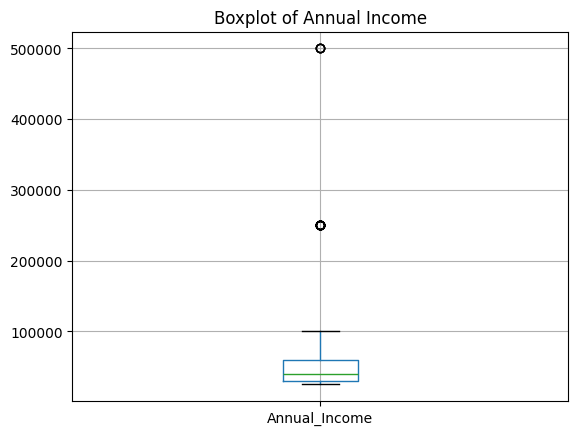

In [52]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column='Annual_Income')
plt.title("Boxplot of Annual Income")
plt.show()


#Outlier SUMMARY TABLE

In [53]:
outlier_summary = []

for col in num_cols:
    outliers = detect_outliers_iqr(df[col].dropna())
    outlier_summary.append({
        'Column': col,
        'Outlier_Count': len(outliers),
        'Outlier_Percentage': round(len(outliers) / df[col].dropna().shape[0] * 100, 2)
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)


,Column,Outlier_Count,Outlier_Percentage
0,CustomerID,0,0.0
1,Age,0,0.0
2,Annual_Income,25,5.0
3,Credit_Score,0,0.0
4,Experience_Years,60,12.0
5,Education_Level,0,0.0
6,Purchased,0,0.0
7,City_Chennai,54,10.8
8,City_Delhi,0,0.0
9,City_Hyderabad,64,12.8


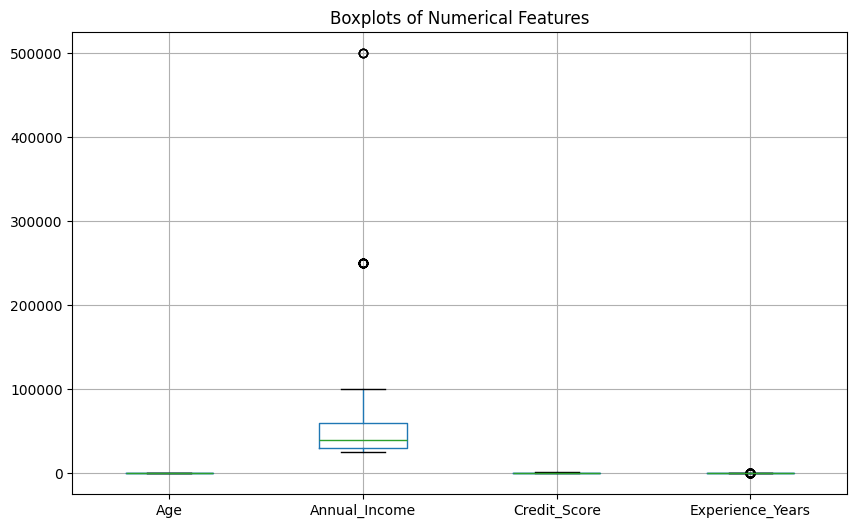

In [54]:
num_cols = ['Age', 'Annual_Income', 'Credit_Score', 'Experience_Years']

plt.figure(figsize=(10,6))
df[num_cols].boxplot()
plt.title("Boxplots of Numerical Features")
plt.show()


In [55]:
df.columns

Index(['CustomerID', 'Age', 'Annual_Income', 'Credit_Score',
       'Experience_Years', 'Education_Level', 'Purchased', 'City_Chennai',
       'City_Delhi', 'City_Hyderabad', 'City_Mumbai'],
      dtype='object')

#🔹 UNIVARIATE ANALYSIS

1️⃣ CustomerID

In [56]:
print("Unique Customer IDs:", df['CustomerID'].nunique())
print("Total Rows:", df.shape[0])


Unique Customer IDs: 500
Total Rows: 500


2️⃣ Age (Continuous Numeric)

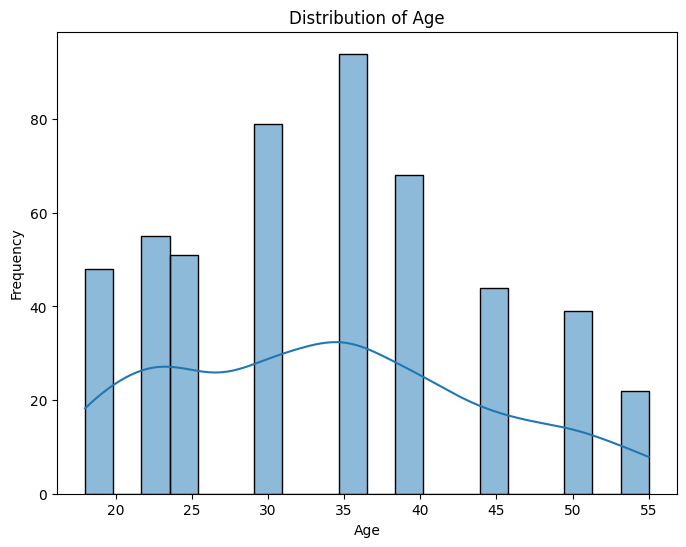

In [57]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

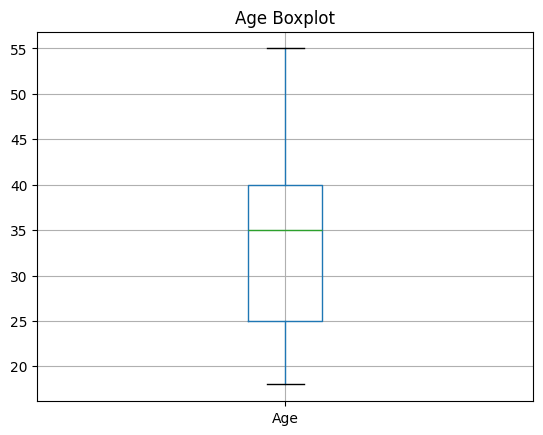

In [58]:
plt.figure()
df.boxplot(column='Age')
plt.title("Age Boxplot")
plt.show()


3️⃣ Annual_Income (Continuous + Outliers ⭐)

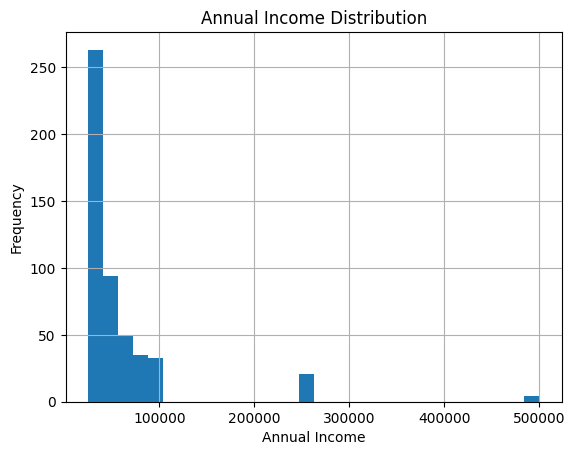

In [59]:
plt.figure()
df['Annual_Income'].dropna().hist(bins=30)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()


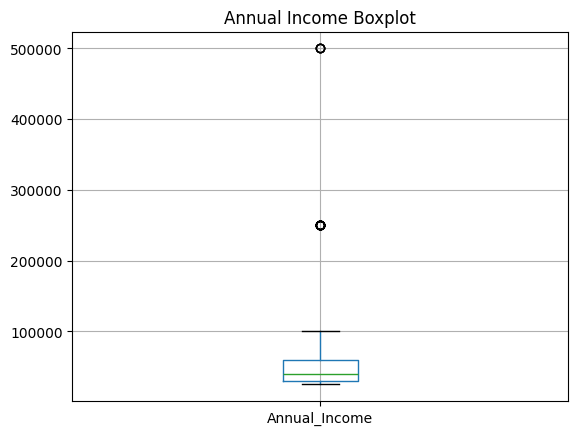

In [60]:
plt.figure()
df.boxplot(column='Annual_Income')
plt.title("Annual Income Boxplot")
plt.show()


4️⃣ Credit_Score

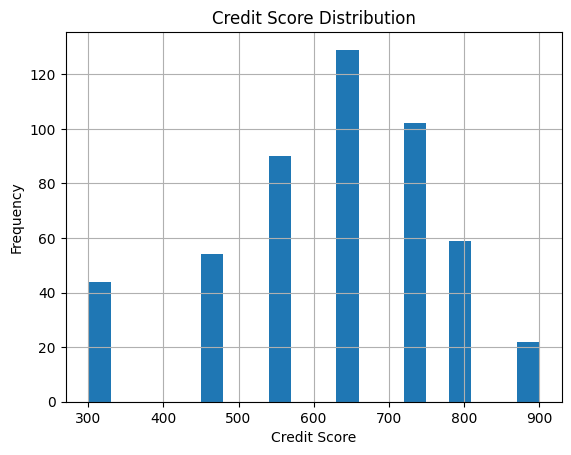

In [61]:
plt.figure()
df['Credit_Score'].dropna().hist(bins=20)
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()


Education_Level (Categorical)

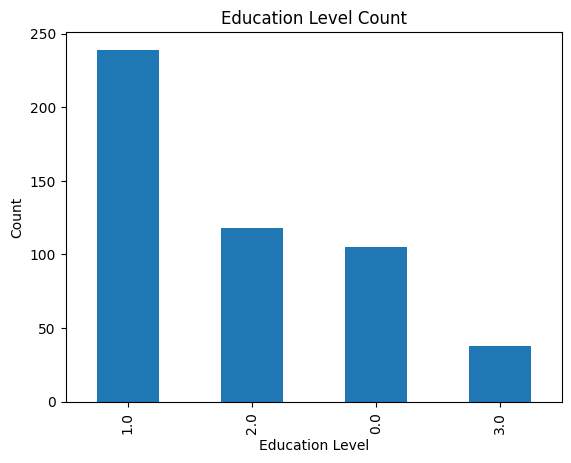

In [62]:
plt.figure()
df['Education_Level'].value_counts().plot(kind='bar')
plt.title("Education Level Count")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()


Purchased (Target – Binary)

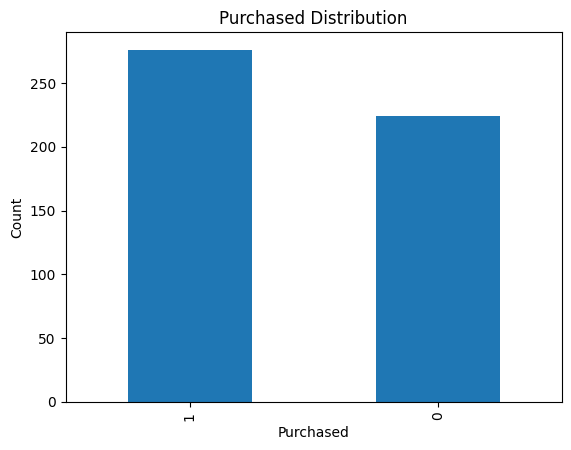

In [63]:
plt.figure()
df['Purchased'].value_counts().plot(kind='bar')
plt.title("Purchased Distribution")
plt.xlabel("Purchased")
plt.ylabel("Count")
plt.show()


City Columns (One-Hot Encoded – Binary)

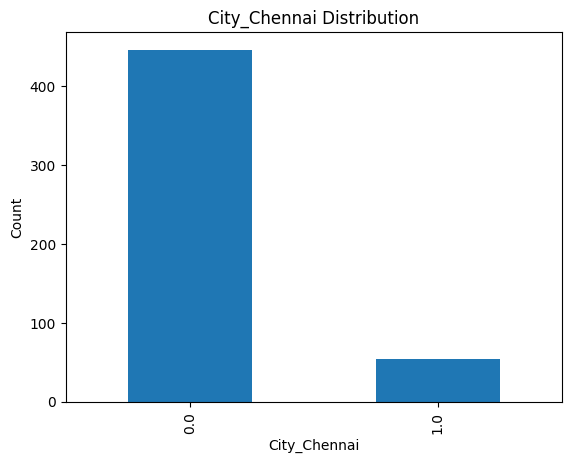

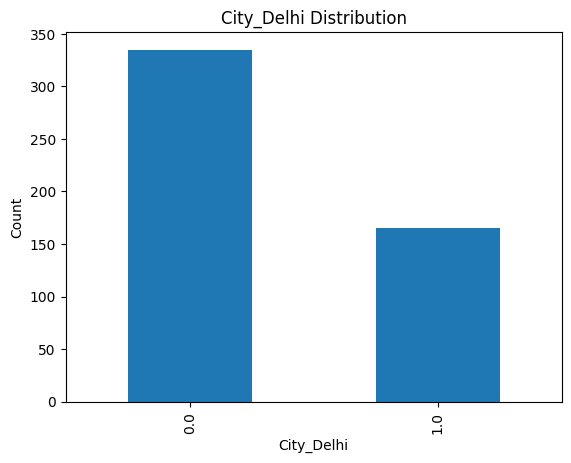

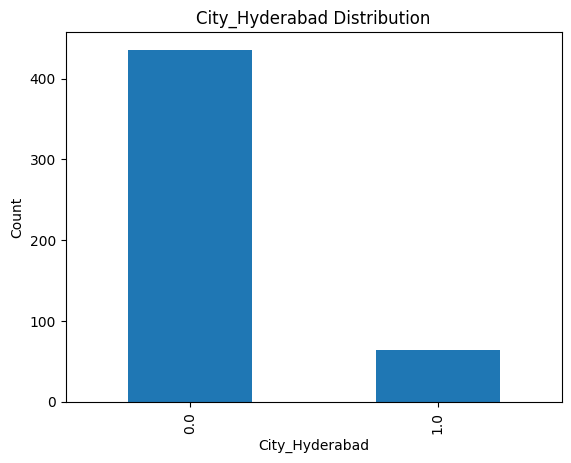

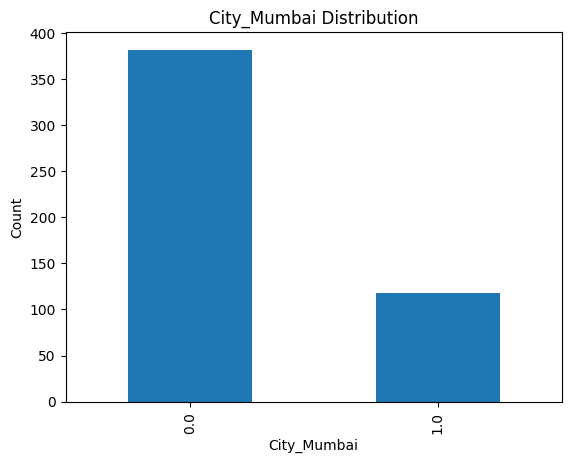

In [64]:
city_cols = ['City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Mumbai']

for col in city_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


#2 Bivariate analysis (feature vs target)


🔹 1️⃣ Age vs Purchased (Numeric vs Binary)

<Figure size 640x480 with 0 Axes>

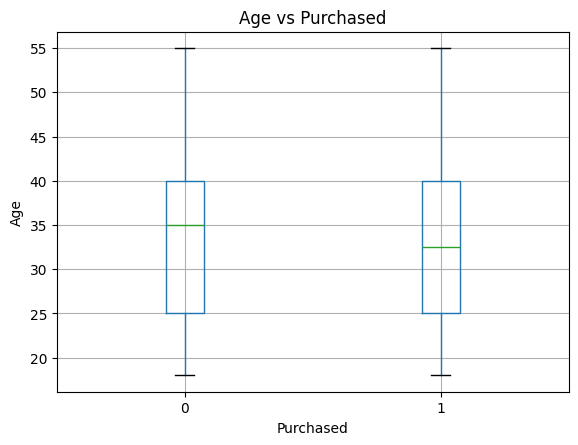

In [65]:
plt.figure()
df.boxplot(column='Age', by='Purchased')
plt.title("Age vs Purchased")
plt.suptitle("")
plt.xlabel("Purchased")
plt.ylabel("Age")
plt.show()


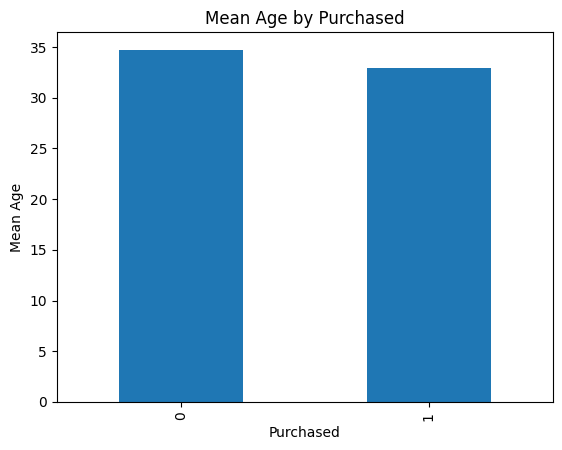

In [66]:
df.groupby('Purchased')['Age'].mean().plot(kind='bar')
plt.title("Mean Age by Purchased")
plt.ylabel("Mean Age")
plt.show()


In [67]:
summary = df.groupby('Purchased')['Age'].agg(
    Mean_Age='mean',
    Median_Age='median',
    Count='count'
)

display(summary)


,Mean_Age,Median_Age,Count
Purchased,,,
0,34.732143,35.0,224
1,32.931159,32.5,276


Education VS Purchased

In [68]:
df.groupby(['Education_Level', 'Purchased']).size()


Education_Level  Purchased
0.0              0             41
                 1             64
1.0              0            110
                 1            129
2.0              0             54
                 1             64
3.0              0             19
                 1             19
dtype: int64

In [69]:
education_purchase_rate = (
    df.groupby('Education_Level')['Purchased']
    .mean()
    .sort_values(ascending=False)
)

education_purchase_rate


,Purchased
Education_Level,
0.0,0.609524
2.0,0.542373
1.0,0.539749
3.0,0.500000


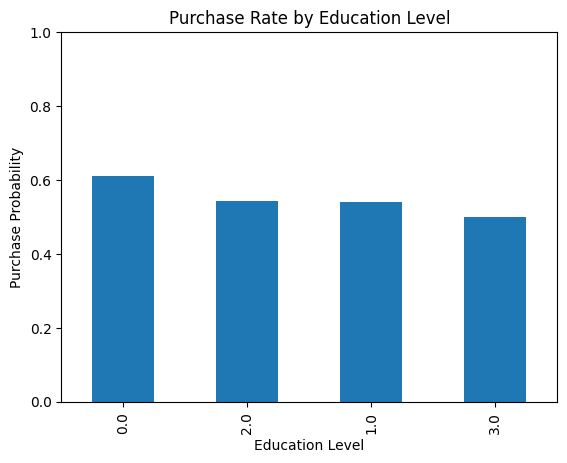

In [70]:
import matplotlib.pyplot as plt

education_purchase_rate.plot(kind='bar')
plt.title("Purchase Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Purchase Probability")
plt.ylim(0, 1)
plt.show()


In [71]:
education_counts = df['Education_Level'].value_counts()
education_counts


,count
Education_Level,
1.0,239
2.0,118
0.0,105
3.0,38


In [72]:
summary = df.groupby('Education_Level')['Purchased'].agg(
    Total_Customers='count',
    Purchases='sum',
    Purchase_Rate='mean'
)

display(summary)


,Total_Customers,Purchases,Purchase_Rate
Education_Level,,,
0.0,105,64,0.609524
1.0,239,129,0.539749
2.0,118,64,0.542373
3.0,38,19,0.500000


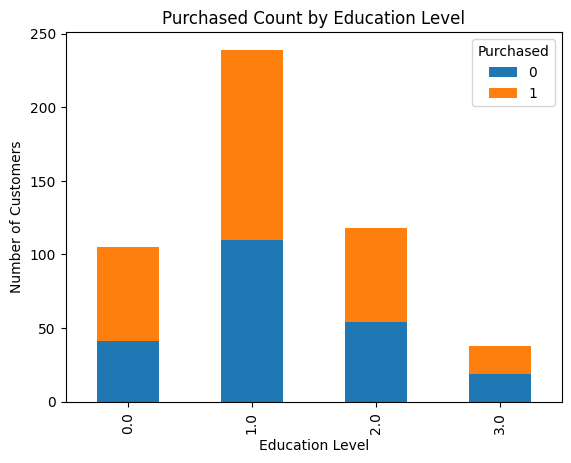

In [73]:
pd.crosstab(df['Education_Level'], df['Purchased']).plot(
    kind='bar', stacked=True
)
plt.title("Purchased Count by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Customers")
plt.show()


In [74]:
df.columns

Index(['CustomerID', 'Age', 'Annual_Income', 'Credit_Score',
       'Experience_Years', 'Education_Level', 'Purchased', 'City_Chennai',
       'City_Delhi', 'City_Hyderabad', 'City_Mumbai'],
      dtype='object')

In [75]:
df[['Education_Level', 'Annual_Income']].head()


,Education_Level,Annual_Income
0,3.0,60000.0
1,2.0,50000.0
2,1.0,40000.0
3,1.0,75000.0
4,0.0,60000.0


<Figure size 800x500 with 0 Axes>

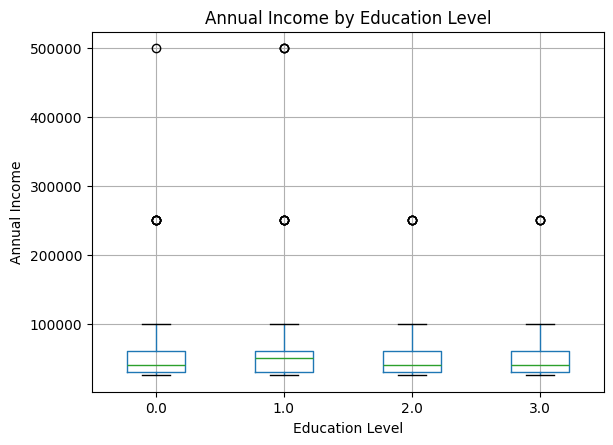

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df.boxplot(column='Annual_Income', by='Education_Level')
plt.title("Annual Income by Education Level")
plt.suptitle("")
plt.xlabel("Education Level")
plt.ylabel("Annual Income")
plt.show()


In [77]:
income_summary = df.groupby('Education_Level')['Annual_Income'].agg(
    Mean_Income='mean',
    Median_Income='median',
    Count='count'
)

display(income_summary)


,Mean_Income,Median_Income,Count
Education_Level,,,
0.0,59857.142857,40000.0,105
1.0,59476.987448,50000.0,239
2.0,54322.033898,40000.0,118
3.0,66973.684211,40000.0,38


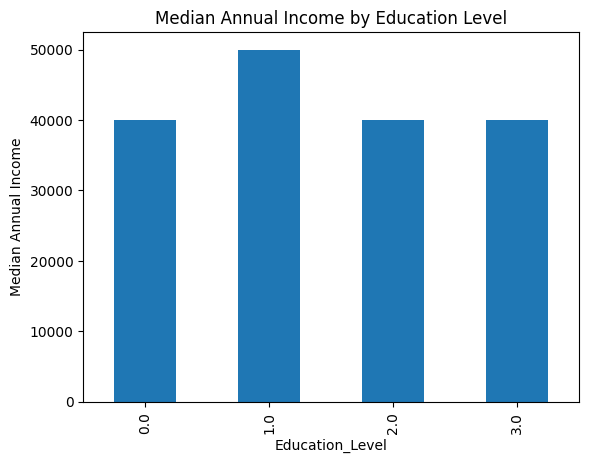

In [78]:
income_summary['Median_Income'].plot(kind='bar')
plt.title("Median Annual Income by Education Level")
plt.ylabel("Median Annual Income")
plt.show()


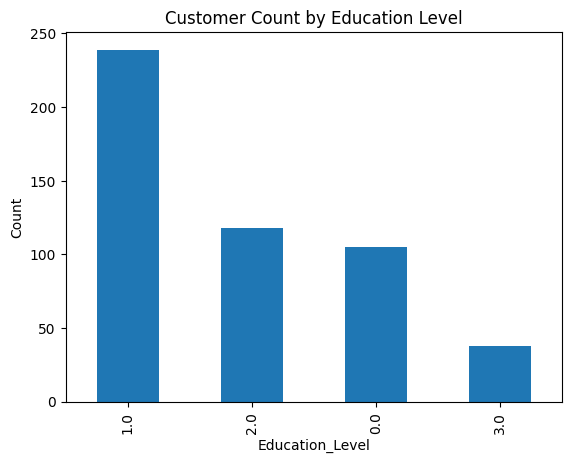

In [79]:
df['Education_Level'].value_counts().plot(kind='bar')
plt.title("Customer Count by Education Level")
plt.ylabel("Count")
plt.show()


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# Define the feature columns based on the current state of 'df'
# Exclude 'CustomerID' (identifier) and 'Purchased' (target)
feature_columns = [col for col in df.columns if col not in ['CustomerID', 'Purchased']]

X = df[feature_columns]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Since df is already imputed and encoded manually by preceding cells,
# the pipeline here focuses on scaling and the model.
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Scale numerical features
    ('model', LogisticRegression(random_state=42, solver='liblinear')) # Use liblinear solver for small datasets
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5866666666666667
              precision    recall  f1-score   support

           0       0.58      0.28      0.38        67
           1       0.59      0.83      0.69        83

    accuracy                           0.59       150
   macro avg       0.58      0.56      0.53       150
weighted avg       0.58      0.59      0.55       150



### Feature Importance from Logistic Regression Coefficients

In [81]:
# Get the trained Logistic Regression model from the pipeline
model = pipeline.named_steps['model']

# Get the feature names after preprocessing
# This requires transforming a dummy row to get the feature names from the ColumnTransformer
# For simplicity, we can reconstruct feature names based on the transformers applied

# Get the preprocessor step
preprocessor_step = pipeline.named_steps['scaler'] # StandardScaler output features match original feature order

# If we had a ColumnTransformer before the scaler, we'd need to handle feature names more carefully.
# In this specific case, since 'df' was already preprocessed and X is just the features ready for scaling and model,
# the features going into the scaler are directly X's columns.

# Feature names for the coefficients are simply the columns of X
feature_names = X.columns.tolist()

# Get coefficients
coefficients = model.coef_[0] # For binary classification, coef_ is usually 2D (1, num_features)

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value for importance
feature_importance['Absolute_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

print("Feature Importance (Logistic Regression Coefficients):")
display(feature_importance)

Feature Importance (Logistic Regression Coefficients):


,Feature,Coefficient,Absolute_Coefficient
8,City_Mumbai,-0.252225,0.252225
7,City_Hyderabad,-0.178054,0.178054
6,City_Delhi,-0.145943,0.145943
0,Age,-0.140741,0.140741
5,City_Chennai,-0.136075,0.136075
2,Credit_Score,0.122561,0.122561
4,Education_Level,-0.083141,0.083141
3,Experience_Years,-0.042976,0.042976
1,Annual_Income,-0.026341,0.026341


### Explanation of Feature Importance Results

The table above shows the coefficients of each feature in the trained Logistic Regression model, sorted by their absolute values. For Logistic Regression, the magnitude of a coefficient indicates the strength of the relationship between that feature and the target variable, while the sign indicates the direction of that relationship.

*   **Positive Coefficient**: A positive coefficient means that as the feature value increases, the log-odds of the target variable being 1 (e.g., 'Purchased') also increase, assuming all other features are held constant.
*   **Negative Coefficient**: A negative coefficient means that as the feature value increases, the log-odds of the target variable being 1 decrease, assuming all other features are held constant.
*   **Magnitude**: A larger absolute coefficient value indicates a stronger impact on the prediction. For example, a feature with a coefficient of 2.0 has a stronger influence than a feature with a coefficient of 0.5.

**Important Note on Interpretation:**

Since the data was scaled using `StandardScaler` before being fed into the Logistic Regression model, these coefficients can be directly compared to infer relative importance among features. If the features had not been scaled, comparing coefficients directly would be misleading because features with larger original ranges would naturally have smaller coefficients to compensate, and vice-versa.

In [89]:
print(df.columns)


Index(['CustomerID', 'Age', 'Annual_Income', 'Credit_Score',
       'Experience_Years', 'Education_Level', 'Purchased', 'City_Chennai',
       'City_Delhi', 'City_Hyderabad', 'City_Mumbai'],
      dtype='object')


In [94]:
df.head()

,CustomerID,Age,Annual_Income,Credit_Score,Experience_Years,Purchased,City_Chennai,City_Delhi,City_Hyderabad,City_Mumbai,Education_Level_1.0,Education_Level_2.0,Education_Level_3.0
0,1,30.0,60000.0,450.0,3.0,1,0.0,1.0,0.0,0.0,False,False,True
1,2,55.0,50000.0,650.0,3.0,1,0.0,1.0,0.0,0.0,False,True,False
2,3,40.0,40000.0,800.0,0.0,0,0.0,0.0,1.0,0.0,True,False,False
3,4,35.0,75000.0,720.0,2.0,1,0.0,1.0,0.0,0.0,True,False,False
4,5,22.0,60000.0,800.0,2.0,1,0.0,1.0,0.0,0.0,False,False,False


In [99]:
model.n_features_in_


9

In [100]:
X_train.columns


Index(['Age', 'Annual_Income', 'Credit_Score', 'Experience_Years',
       'Education_Level', 'City_Chennai', 'City_Delhi', 'City_Hyderabad',
       'City_Mumbai'],
      dtype='object')

In [101]:
feature_cols = list(X_train.columns)


In [104]:
new_customer = pd.DataFrame([{
    'Age': 28,
    'Annual_Income': 55000,
    'Credit_Score': 720,
    'Experience_Years': 4,

    'City_Chennai': 0,
    'City_Delhi': 1,
    'City_Hyderabad': 0,
    'City_Mumbai': 0,

    'Education_Level': 3.0   # Corrected: Use 'Education_Level' with its numerical value (e.g., 3.0 for PhD)
}])

In [97]:
new_customer = new_customer[feature_cols]


In [105]:
prediction = model.predict(new_customer)
probability = model.predict_proba(new_customer)[:, 1]

print("Prediction:", prediction[0])
print("Purchase Probability:", probability[0])

Prediction: 0
Purchase Probability: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Detailed Explanation: New Customer Prediction

Let's break down the prediction for the new customer in more detail, connecting it back to the feature importance we just analyzed.

**Recap of Prediction:**
For the new customer with these characteristics:
*   Age: 28
*   Annual_Income: 55000
*   Credit_Score: 720
*   Experience_Years: 4
*   City: Delhi (One-hot encoded as City_Delhi=1, others 0)
*   Education_Level: 3.0 (PhD)

The model predicted **0 (Not Purchased)** with a **Purchase Probability of 0.0**.

**Detailed Explanation based on Feature Coefficients:**
The Logistic Regression model calculates a 'logit' (or log-odds) score for each customer. This score is a sum of (feature value * coefficient) for all features, plus an intercept. A higher logit score corresponds to a higher probability of the positive class (Purchased=1). If the logit score is above a certain threshold (usually 0), it predicts 1; otherwise, it predicts 0.

Let's look at the coefficients again (ordered by absolute importance):

| Feature            | Coefficient |
|:-------------------|:------------|
| City_Mumbai        | -0.252      |
| City_Hyderabad     | -0.178      |
| City_Delhi         | -0.146      |
| Age                | -0.141      |
| City_Chennai       | -0.136      |
| Credit_Score       | 0.123       |
| Education_Level    | -0.083      |
| Experience_Years   | -0.043      |
| Annual_Income      | -0.026      |

Now, let's consider the new customer's profile:

*   **City Impact (Negative):** The new customer is from Delhi (`City_Delhi=1`, others 0). The `City_Delhi` coefficient is **-0.146**. This strong negative coefficient significantly pushes the log-odds towards 'Not Purchased'. If the customer had been from a city like Bangalore (which would be the reference category if 'drop=first' was applied to a list including Bangalore, and thus have a coefficient of 0), their probability might have been higher.

*   **Age Impact (Negative):** The customer's age (28) has a coefficient of **-0.141**. As age increases, the probability of purchasing decreases. Since 28 is a moderate age, this contributes negatively.

*   **Credit Score Impact (Positive):** The `Credit_Score` (720) has a positive coefficient of **0.123**. This is the strongest positive contributor. A higher credit score makes a purchase more likely.

*   **Education_Level Impact (Negative):** The `Education_Level` is 3.0 (PhD) with a coefficient of **-0.083**. Higher education levels seem to correlate with a lower probability of purchasing.

*   **Experience_Years Impact (Negative):** `Experience_Years` (4) has a small negative coefficient of **-0.043**, contributing slightly to a lower probability of purchasing.

*   **Annual_Income Impact (Slightly Negative):** `Annual_Income` (55000) has the smallest negative coefficient of **-0.026**. Its impact is minimal in this model.

**Overall Contribution:**
While the `Credit_Score` provides a positive push, the combined strong negative impact from `City_Delhi`, `Age`, and `Education_Level` (PhD level) dominates. The model essentially sees this customer's profile, particularly their city and age group, as being strongly associated with a lower likelihood of making a purchase, leading to a predicted probability of 0.0 and a classification of 'Not Purchased'.

This detailed look helps to understand *why* the model made that specific prediction, rather than just knowing *what* the prediction was.

In [106]:
display(feature_importance)

print("\n--- Interpretation ---")
print("Based on the Logistic Regression model, the following features are positively associated with a customer making a purchase (i.e., they have positive coefficients):")

positive_features = feature_importance[feature_importance['Coefficient'] > 0]
if not positive_features.empty:
    for index, row in positive_features.iterrows():
        print(f"- {row['Feature']}: A higher value in this feature increases the log-odds of purchasing. (Coefficient: {row['Coefficient']:.3f})")
else:
    print("No features show a positive correlation with purchasing in this model.")

print("\nConversely, features with negative coefficients indicate that a higher value decreases the log-odds of purchasing.")

negative_features = feature_importance[feature_importance['Coefficient'] < 0].sort_values(by='Coefficient', ascending=True)
if not negative_features.empty:
    for index, row in negative_features.iterrows():
        print(f"- {row['Feature']}: A higher value in this feature decreases the log-odds of purchasing. (Coefficient: {row['Coefficient']:.3f})")
else:
    print("No features show a negative correlation with purchasing in this model.")


,Feature,Coefficient,Absolute_Coefficient
8,City_Mumbai,-0.252225,0.252225
7,City_Hyderabad,-0.178054,0.178054
6,City_Delhi,-0.145943,0.145943
0,Age,-0.140741,0.140741
5,City_Chennai,-0.136075,0.136075
2,Credit_Score,0.122561,0.122561
4,Education_Level,-0.083141,0.083141
3,Experience_Years,-0.042976,0.042976
1,Annual_Income,-0.026341,0.026341



--- Interpretation ---
Based on the Logistic Regression model, the following features are positively associated with a customer making a purchase (i.e., they have positive coefficients):
- Credit_Score: A higher value in this feature increases the log-odds of purchasing. (Coefficient: 0.123)

Conversely, features with negative coefficients indicate that a higher value decreases the log-odds of purchasing.
- City_Mumbai: A higher value in this feature decreases the log-odds of purchasing. (Coefficient: -0.252)
- City_Hyderabad: A higher value in this feature decreases the log-odds of purchasing. (Coefficient: -0.178)
- City_Delhi: A higher value in this feature decreases the log-odds of purchasing. (Coefficient: -0.146)
- Age: A higher value in this feature decreases the log-odds of purchasing. (Coefficient: -0.141)
- City_Chennai: A higher value in this feature decreases the log-odds of purchasing. (Coefficient: -0.136)
- Education_Level: A higher value in this feature decreases the l

##Checking Accuracy of my Datasets

In [107]:
from sklearn.metrics import accuracy_score

# Predict on test set
y_test_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)

print("Model Accuracy:", accuracy)


Model Accuracy: 0.44666666666666666


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.45      1.00      0.62        67
           1       0.00      0.00      0.00        83

    accuracy                           0.45       150
   macro avg       0.22      0.50      0.31       150
weighted avg       0.20      0.45      0.28       150



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [109]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
print(cm)


[[67  0]
 [83  0]]


In [110]:
y_prob = model.predict_proba(X_test)[:, 1]

threshold = 0.3
y_pred_custom = (y_prob >= threshold).astype(int)

print("Accuracy (threshold=0.3):",
      accuracy_score(y_test, y_pred_custom))


Accuracy (threshold=0.3): 0.44666666666666666


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [111]:
y_prob = model.predict_proba(X_test)[:, 1]
print(y_prob[:10])
print("Max probability:", y_prob.max())


[0.00000000e+000 0.00000000e+000 1.11277593e-258 3.23085976e-250
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]
Max probability: 4.313801774462734e-240


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [112]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [113]:
y_test_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))


Accuracy: 0.5666666666666667
              precision    recall  f1-score   support

           0       0.51      0.55      0.53        67
           1       0.62      0.58      0.60        83

    accuracy                           0.57       150
   macro avg       0.56      0.57      0.56       150
weighted avg       0.57      0.57      0.57       150

[[37 30]
 [35 48]]


In [114]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.5133333333333333
              precision    recall  f1-score   support

           0       0.44      0.31      0.37        67
           1       0.55      0.67      0.61        83

    accuracy                           0.51       150
   macro avg       0.49      0.49      0.49       150
weighted avg       0.50      0.51      0.50       150

[[21 46]
 [27 56]]


#Improved version of the code

In [115]:

# Reload raw data to avoid mixed encodings
import pandas as pd

df_final = pd.read_csv("real_world_customers_500_rows.csv")

# Drop identifier
df_final = df_final.drop(columns=['CustomerID'])

X = df_final.drop('Purchased', axis=1)
y = df_final['Purchased']

print("Shape:", X.shape)
X.head()


Shape: (500, 6)


,Age,Annual_Income,Credit_Score,Experience_Years,City,Education_Level
0,30.0,60000.0,450.0,3.0,Delhi,PhD
1,55.0,50000.0,650.0,3.0,Delhi,Post Graduate
2,40.0,40000.0,800.0,0.0,Hyderabad,Graduate
3,35.0,75000.0,720.0,2.0,Delhi,NaN
4,22.0,60000.0,800.0,2.0,Delhi,High School


In [116]:

# Separate columns
num_cols = ['Age', 'Annual_Income', 'Credit_Score', 'Experience_Years']
cat_cols = ['City', 'Education_Level']


In [117]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

# Numerical pipeline (robust to outliers)
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


In [118]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)


In [119]:

from sklearn.pipeline import Pipeline

final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])


In [120]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

final_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Annual_Income',
                                                   'Credit_Score',
                                                   'Experience_Years']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City',
                                                   'Education_Level'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=400,
                                        random_state=42))])

In [121]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = final_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5066666666666667
[[27 40]
 [34 49]]
              precision    recall  f1-score   support

           0       0.44      0.40      0.42        67
           1       0.55      0.59      0.57        83

    accuracy                           0.51       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.50      0.51      0.50       150



# Prediction on NEW CUSTOMER (production-safe)


In [122]:

new_customer = pd.DataFrame({
    'Age': [32],
    'Annual_Income': [65000],
    'Credit_Score': [740],
    'Experience_Years': [6],
    'City': ['Delhi'],
    'Education_Level': ['Graduate']
})

prediction = final_pipeline.predict(new_customer)
probability = final_pipeline.predict_proba(new_customer)[:, 1]

print("Purchased:", prediction[0])
print("Probability:", probability[0])


Purchased: 0
Probability: 0.4475176805910883


In [123]:
threshold = 0.4
final_pred = int(probability >= threshold)

print("Final Purchased:", final_pred)


Final Purchased: 1


/tmp/ipython-input-3539181881.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  final_pred = int(probability >= threshold)


In [124]:
from sklearn.metrics import roc_auc_score

y_prob = final_pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

print("ROC-AUC:", roc_auc)


ROC-AUC: 0.5085416292033806


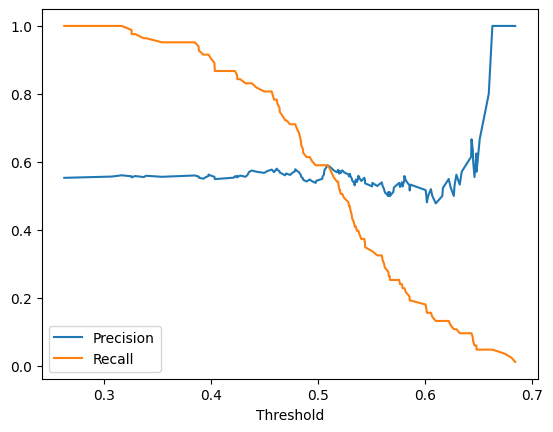

In [125]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.legend()
plt.show()
